## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [366]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [367]:
#all data sets
#open from csv the shareholder list as a dataframe

df_investment_rel_angel_startup = pd.read_csv("dataframes/shareholder_relations_2021_rows_updated.csv")
    #open from csv the shareholders as a dataframe
df_angels = pd.read_csv("dataframes/angels.csv")
    #open from csv the startups as a dataframe
df_startups = pd.read_csv("dataframes/startups_rows_updated.csv")


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/1432991832.py:6: DtypeWarning: Columns (0,2,4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_angels = pd.read_csv("dataframes/angels.csv")


In [368]:
df_investment_rel_angel_startup

relation_id                     created_at             shareholder_name  \
0           29966  2024-03-08 08:40:55.082811+00  Pascal Pierre Zambou Zoleko   
1           29967  2024-03-08 08:40:55.135192+00                  Sarsar Deli   
2           29974  2024-03-08 08:40:55.423167+00                Ahmad, Naveed   
3           29981  2024-03-08 08:40:56.052196+00                 Klaus Gourgé   
4           29984  2024-03-08 08:40:56.103733+00                  Thomas Post   
...           ...                            ...                          ...   
27777       25172  2024-03-01 09:18:28.402269+00     Fabian Haeckermann Godoy   
27778       25174   2024-03-01 09:18:28.49628+00                 Paul Ortlepp   
27779       26761  2024-03-01 09:34:27.621253+00            Thorsten Patzlaff   
27780       27449  2024-03-01 09:42:29.558153+00                  Sven Günzel   
27781       27564  2024-03-01 09:43:33.786003+00     Heinrich Keiho Menk-haus   

          shareholder_location   birthdate register_id register_court  \
0                        Fürth  1995-05-16         NaN            NaN   
1                      Toronto  1993-11-16         NaN            NaN   
2                         Kiel  1994-12-03         NaN            NaN   
3      60323 Frankfurt am Main  1963-12-05         NaN            NaN   
4                    Lichtenau  1980-03-06         NaN            NaN   
...                        ...         ...         ...            ...   
27777                   Berlin  1989-04-20         NaN            NaN   
27778                  Leipzig  1995-06-08         NaN            NaN   
27779             49716 Meppen  1979-07-03         NaN            NaN   
27780                 Karlsbad  1976-08-02         NaN            NaN   
27781                   Berlin  1992-11-19         NaN            NaN   

      percentage_of_total_shares shareholder_type  \
0                           26.0               md   
1                           26.0              NaN   
2                           0.05              NaN   
3                           50.0              NaN   
4                           25.0              NaN   
...                          ...              ...   
27777                       34.0              NaN   
27778                        3.0              NaN   
27779                      100.0               md   
27780                      0.004              NaN   
27781                      26.92              NaN   

                                            startup_name  ...  \
0              Flexudy Education UG (haftungsbeschränkt)  ...   
1              Flexudy Education UG (haftungsbeschränkt)  ...   
2                         Varent UG (haftungsbeschränkt)  ...   
3      turtuga - change maker community UG (haftungsb...  ...   
4                    Clevercreek UG (haftungsbeschränkt)  ...   
...                                                  ...  ...   
27777                          3D Digital Warehouse GmbH  ...   
27778                          3D Digital Warehouse GmbH  ...   
27779                             Ganzheitlich Hund GmbH  ...   
27780                                        kasuwa GmbH  ...   
27781                                     SUSUMU AI GmbH  ...   

      register_mapping      shareholder_name_mapped founding_date  \
0                  0.0  Pascal Pierre Zambou Zoleko           NaN   
1                  0.0                  Sarsar Deli           NaN   
2                  0.0                Ahmad, Naveed           NaN   
3                  0.0                 Klaus Gourgé           NaN   
4                  0.0                  Thomas Post           NaN   
...                ...                          ...           ...   
27777              0.0     Fabian Haeckermann Godoy           NaN   
27778              0.0                 Paul Ortlepp           NaN   
27779              0.0            Thorsten Patzlaff           NaN   
27780              0.0                  Sven Gün

In [369]:
# Check if 'shareholder_name' is unique in df_angels
if df_angels['shareholder_name'].is_unique:
    # If it is unique, you can set it as index and perform the map operation
    df_investment_rel_angel_startup['shareholder_type'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels.set_index('shareholder_name')['shareholder_type'])
else:
    # If it is not unique, you need to handle the duplicates first
    # This is an example where we drop duplicates, keeping the first occurrence
    df_angels_unique = df_angels.drop_duplicates(subset=['shareholder_name'], keep='first')
    df_investment_rel_angel_startup['shareholder_type'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels_unique.set_index('shareholder_name')['shareholder_type'])

In [370]:
#return df startups with number_shareholders > 2
def filter_startups(df_startups):
    df_startups = df_startups[df_startups['number_shareholders'] >2]
    return df_startups
filter_startups(df_startups)

startup_id                     created_at  \
0           1195  2024-01-17 10:12:51.416275+00   
1          10856  2024-01-17 10:12:59.864646+00   
3           1872  2024-01-17 10:12:52.534717+00   
5           8900  2024-01-17 10:12:58.304802+00   
7           3386   2024-01-17 10:12:53.52288+00   
...          ...                            ...   
8887        6189  2024-01-17 10:12:55.987461+00   
8888        7902   2024-01-17 10:12:57.57515+00   
8889       12212  2024-01-17 10:13:01.504395+00   
8890         534  2024-01-17 10:12:50.707796+00   
8891       16808  2024-03-07 16:06:33.821507+00   

                              startup_name  \
0     Building Information Cloud GLWG GmbH   
1                     Cosuno Ventures GmbH   
3                           SigmaHeat GmbH   
5                           EMINERALS GmbH   
7                              mipart GmbH   
...                                    ...   
8887                 Lifeasy Services GmbH   
8888             PropTech Innovations GmbH   
8889                          PI ROPE GmbH   
8890                        Tilo Tech GmbH   
8891  Ravage Games UG (haftungsbeschränkt)   

                                       shareholder_json  \
0     {"shareholders":[{"shareholder_name":"Herr Uni...   
1     {"shareholders":[{"shareholder_name":"Laubach ...   
3     {"shareholders":[{"shareholder_name":"Polarize...   
5     {"shareholders":[{"shareholder_name":"N1 Tradi...   
7                                                   NaN   
...                                                 ...   
8887                                                NaN   
8888                                                NaN   
8889                                                NaN   
8890  {"shareholders":[{"shareholder_name":"MajorGro...   
8891                                                NaN   

                                               list_mds  number_angels  \
0     {"name":{"0":1195,"1":1195,"2":1195},"total_MD...            NaN   
1     {"name":{"0":10856,"1":10856,"2":10856},"akten...            NaN   
3     {"name":{"0":1872},"total_MDs":{"0":1},"gegens...            NaN   
5     {"name":{"0":8900},"total_MDs":{"0":1},"gegens...            NaN   
7     {"name":{"0":3386},"total_MDs":{"0":1},"gegens...            NaN   
...                                                 ...            ...   
8887  {"name":{"0":6189},"total_MDs":{"0":1},"gegens...            NaN   
8888  {"name":{"0":7902,"1":7902},"total_MDs":{"0":2...            NaN   
8889  {"name":{"0":12212},"total_MDs":{"0":1},"gegen...            NaN   
8890  {"name":{"0":534,"1":534,"2":534},"aktenzeiche...            NaN   
8891  {"name":{"0":16808},"total_MDs":{"0":1},"gegen...            NaN   

     startup_industry                                    startup_purpose  \
0            Bauwesen  {"gegenstand": "die Entwicklung und der Vertri...   
1            Bauwesen  {"gegenstand": "der Betrieb von Internet-Platt...   
3            Bauwesen  {"gegenstand": "Die Entwicklung, industrielle ...   
5            Bauwesen  {"gegenstand": "Der Betrieb digitaler Plattfor...   
7           Industrie  {"gegenstand": "Der Betrieb einer On-Demand-Ma...   
...               ...                                                ...   
8887   Dienstleistung  {"gegenstand": "Die Erbringung von Dienst- und...   
8888       Immobilien  {"gegenstand": "Dienstleistungen im Bereich de...   
8889        Mobilität  {"gegenstand": "Herstellung und Verkauf von La...   
8890         Software  {"gegenstand": "Entwicklung und Vertrieb von T...   
8891           Gaming  {"gegenstand": "Gegenstand des Unternehmens is...   

                             link_shareholder_file_2021  \
0     Building Information Cloud GLWG GmbH_Nrnberg_H...   
1     Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...   
3     SigmaHeat GmbH_Hannover_HRB 221918/Liste der G...   
5     EMINERALS GmbH_Mannheim_HRB 732473/Liste der G...   
7     mipart GmbH_Weiden i d OPf_H

In [371]:
#drop duplicates in df_angels
print(len(df_angels))
df_angels = df_angels.drop_duplicates(subset = "shareholder_name", keep = "first") 
print(len(df_angels))

19888
19886


In [372]:
#return all rows in df_angels where firstname and lastname are duplicates
df_angels_duplicates = df_angels[df_angels.duplicated(subset=['firstname', 'lastname'])]
#give me only the first and last name of the duplicates as well as shareholder_name
df_angels_duplicates = df_angels_duplicates[['firstname', 'lastname', 'shareholder_name']]
#ignore all where firstname and lastname are NaN
df_angels_duplicates = df_angels_duplicates.dropna(subset=['firstname', 'lastname'])
#sort by first name
df_angels_duplicates = df_angels_duplicates.sort_values(by=['firstname'])

df_angels_duplicates


Empty DataFrame
Columns: [firstname, lastname, shareholder_name]
Index: []

In [373]:
#get all from df angel where firstname is Wolgang and lastname is Rams
temp =df_angels[df_angels['firstname'] == 'Andreas'][df_angels['lastname'] == 'Koch']
#only giveme the first and last name and shareholder_name and birthdate
temp['shareholder_name']
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == 'Andreas Koch']

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/414073135.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp =df_angels[df_angels['firstname'] == 'Andreas'][df_angels['lastname'] == 'Koch']


relation_id                     created_at         shareholder_name  \
15815       17913  2024-02-29 21:03:00.752933+00             Andreas Koch   
19085        8910  2024-02-29 19:10:44.339912+00  Koch, Prof. Dr. Andreas   

        shareholder_location   birthdate register_id register_court  \
15815  Vogtsburg/Oberrotweil  1957-01-09         NaN            NaN   
19085          64807 Dieburg  1968-02-28         NaN            NaN   

      percentage_of_total_shares shareholder_type              startup_name  \
15815                        1.5            angel           Compositas GmbH   
19085                        2.0            angel  Xelera Technologies GmbH   

       ... register_mapping  shareholder_name_mapped founding_date  \
15815  ...              0.0             Andreas Koch           NaN   
19085  ...              0.0             Andreas Koch           NaN   

                                                list_mds firstname  lastname  \
15815  {"name":{"0":11384},"total_mds":{"0":1},"gegen...   andreas      koch   
19085  {"name":{"0":10827},"total_mds":{"0":1},"gegen...       NaN       NaN   

           startup_industry_mapped        startup_region count region_mapping  
15815  technology_digital_services  freiburg im breisgau   1.0          other  
19085  technology_digital_services             darmstadt   1.0      frankfurt  

[2 rows x 23 columns]

In [374]:
# #read in shareholders csv
# df_shareholders = pd.read_csv("dataframes/shareholders.csv", sep=";")
# df_shareholders

# # #count how often each sh occurs in the df_investment_rel_angel_startup and add to column number_of_investments
# df_investment_rel_angel_startup['number_of_investments'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_investment_rel_angel_startup['shareholder_name'].value_counts())
# #get subset of df_investment_rel_angel_startup with only the shareholders that are also in df_shareholders
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_shareholders['shareholder_name'])]
# df_investment_rel_angel_startup
# # # #get ssubset where the number of investments is greater than 1
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_of_investments'] > 1]
# df_investment_rel_angel_startup


In [375]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'md']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:27782
after dropping mds:27782


In [376]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'institution']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:27782
after dropping mds:27782


In [377]:
#calculate the number of shareholders per startup, add it as column number_shareholders
#for each startupId count how often they occur in df_investment_rel_angel_startup and add it into column number_shareholders
df_investment_rel_angel_startup['number_shareholders'] = df_investment_rel_angel_startup['startup_id'].map(df_investment_rel_angel_startup['startup_id'].value_counts())
df_investment_rel_angel_startup

# #drop all rows where number_shareholders is 1
# print(f"before dropping single shareholders:{len(df_investment_rel_angel_startup)}")
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_shareholders'] != 1]
# print(f"after dropping single shareholders:{len(df_investment_rel_angel_startup)}")

#return df_invetment_rel_angel_startup with number_shareholders =1



relation_id                     created_at             shareholder_name  \
0           29966  2024-03-08 08:40:55.082811+00  Pascal Pierre Zambou Zoleko   
1           29967  2024-03-08 08:40:55.135192+00                  Sarsar Deli   
2           29974  2024-03-08 08:40:55.423167+00                Ahmad, Naveed   
3           29981  2024-03-08 08:40:56.052196+00                 Klaus Gourgé   
4           29984  2024-03-08 08:40:56.103733+00                  Thomas Post   
...           ...                            ...                          ...   
27777       25172  2024-03-01 09:18:28.402269+00     Fabian Haeckermann Godoy   
27778       25174   2024-03-01 09:18:28.49628+00                 Paul Ortlepp   
27779       26761  2024-03-01 09:34:27.621253+00            Thorsten Patzlaff   
27780       27449  2024-03-01 09:42:29.558153+00                  Sven Günzel   
27781       27564  2024-03-01 09:43:33.786003+00     Heinrich Keiho Menk-haus   

          shareholder_location   birthdate register_id register_court  \
0                        Fürth  1995-05-16         NaN            NaN   
1                      Toronto  1993-11-16         NaN            NaN   
2                         Kiel  1994-12-03         NaN            NaN   
3      60323 Frankfurt am Main  1963-12-05         NaN            NaN   
4                    Lichtenau  1980-03-06         NaN            NaN   
...                        ...         ...         ...            ...   
27777                   Berlin  1989-04-20         NaN            NaN   
27778                  Leipzig  1995-06-08         NaN            NaN   
27779             49716 Meppen  1979-07-03         NaN            NaN   
27780                 Karlsbad  1976-08-02         NaN            NaN   
27781                   Berlin  1992-11-19         NaN            NaN   

      percentage_of_total_shares shareholder_type  \
0                           26.0            angel   
1                           26.0            angel   
2                           0.05            angel   
3                           50.0            angel   
4                           25.0            angel   
...                          ...              ...   
27777                       34.0            angel   
27778                        3.0            angel   
27779                      100.0            angel   
27780                      0.004            angel   
27781                      26.92            angel   

                                            startup_name  ...  \
0              Flexudy Education UG (haftungsbeschränkt)  ...   
1              Flexudy Education UG (haftungsbeschränkt)  ...   
2                         Varent UG (haftungsbeschränkt)  ...   
3      turtuga - change maker community UG (haftungsb...  ...   
4                    Clevercreek UG (haftungsbeschränkt)  ...   
...                                                  ...  ...   
27777                          3D Digital Warehouse GmbH  ...   
27778                          3D Digital Warehouse GmbH  ...   
27779                             Ganzheitlich Hund GmbH  ...   
27780                                        kasuwa GmbH  ...   
27781                                     SUSUMU AI GmbH  ...   

           shareholder_name_mapped  founding_date  \
0      Pascal Pierre Zambou Zoleko            NaN   
1                      Sarsar Deli            NaN   
2                    Ahmad, Naveed            NaN   
3                     Klaus Gourgé            NaN   
4                      Thomas Post            NaN   
...                            ...            ...   
27777     Fabian Haeckermann Godoy            NaN   
27778                 Paul Ortlepp            NaN   
27779            Thorsten Patzlaff            NaN   
27780                  Sven Günzel            NaN   
27781     Heinrich Keiho Menk-haus            NaN   

                                                list_mds  firstname  \
0      {"name":{"0":14192,"1":

In [378]:
print(f"before dropping duplicates:{len(df_investment_rel_angel_startup)}")

df_investment_rel_angel_startup = df_investment_rel_angel_startup.drop_duplicates(subset=['shareholder_name_mapped','startup_id'])
print(f"after dropping duplicates:{len(df_investment_rel_angel_startup)}")

before dropping duplicates:27782
after dropping duplicates:27572


In [379]:
#get subset of df startups that is actually in the df_investment_rel_angel_startup
print(f"before dropping startups not in investment relations:{len(df_startups)}")
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
print(f"after dropping startups not in investment relations:{len(df_startups)}")


before dropping startups not in investment relations:8894
after dropping startups not in investment relations:8893


In [380]:
#get subset of shareholders that are actually in the df_investment_rel_angel_startup
print(f"before dropping shareholders not in investment relations:{len(df_angels)}")
df_angels = df_angels[df_angels['shareholder_name'].isin(df_investment_rel_angel_startup['shareholder_name_mapped'])]
print(f"after dropping shareholders not in investment relations:{len(df_angels)}")

before dropping shareholders not in investment relations:19886
after dropping shareholders not in investment relations:19877


In [381]:
#in df_angeld drop column birthdate_x and rename birthdate_y to birthdate
df_angels = df_angels.drop(columns=['birthdate_x'])
df_angels = df_angels.rename(columns={'birthdate_y':'birthdate'})

In [382]:
#calculate the number of investments per angel, add it as column number_of_investments
#for each shareholder_name_mapped count how often they occur in df_investment_rel_angel_startup and add it into column number_of_investments
df_angels['number_of_investments'] = df_angels['shareholder_name'].map(df_investment_rel_angel_startup['shareholder_name_mapped'].value_counts())
#cast column number of investments to integer
df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)
#assign angels the active status if the hace more than 1 investments
df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
df_angels


#drop column unnamed from df_angels
df_angels = df_angels.drop(columns=['Unnamed: 0'])
df_angels

#get subset of active angels
df_active_angels = df_angels[df_angels['status'] == 'active']
df_active_angels
#drop duplicates in shareholder_name from df_active_angels
df_active_angels = df_active_angels.drop_duplicates(subset=['shareholder_name'])
df_active_angels




shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70              NaN                          NaN             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich stuttgart leipzig cologne frankfurt hamburg other  \
23     ...    0.0       0.0     0.0     0.0       0.0     1.0   0.0   
51     ...    1.0       0.0     0.0     0.0       0.0     0.0   0.0   
70     ...    0.0       0.0     0.0     1.0       0.0     0.0   1.0   
88     ...    0.0       0.0     0.0     2.0       0.0     0.0   0.0   
90     ...    0.0       0.0     0.0     0.0       0.0     0.0   0.0   
...    ... 

In [383]:
#get unique startup_ids
unique_startup_ids = df_investment_rel_angel_startup['startup_id'].unique()
len(unique_startup_ids)

8896

## Creating a Network Graph of all Angels - 1

In [384]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels['shareholder_name'])]
#only angels where status is active



# # Create a new DataFrame where each row represents a co-investment
# co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# # Filter out rows where the investor is the same in both columns
# co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # # Create a table with the number of co-investments for each pair of investors
# co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

# #replace all spaces with _ in shareholder_name_mapped_x
# co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
# co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

# #co_investment_counts.to_csv('co_investment_counts.csv', index=False)

# #sort by number of co-investments
# co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
# co_investment_counts

In [385]:
# # Create a graph from the co_investment_counts DataFrame
# #get subset where co-investments >1
# # co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
# G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# # Draw the graph
# pos = nx.spring_layout(G)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap
# #nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
# #save plot as png
# plt.savefig('output/graphs/co_investments_all_angels.png')
# plt.show()


In [386]:
# # get largest connected component
# largest_cc = max(nx.connected_components(G), key=len)
# subgraph = G.subgraph(largest_cc)
# # Draw the graph
# pos = nx.spring_layout(subgraph)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap

# #save plot as png
# plt.savefig('output/graphs/co_investments_largest_connected_component.png')

In [387]:
# #get number of nodes of G
# len(subgraph.nodes)

In [388]:
# import pandas as pd
# from d3graph import d3graph, vec2adjmat
# source = co_investment_counts['shareholder_name_mapped_x']
# target = co_investment_counts['shareholder_name_mapped_y']
# weight = co_investment_counts['CoInvestments']


# adjmat = vec2adjmat(source, target, weight=weight)
# print(adjmat)
# # Initialize
# d3 = d3graph()

# d3.graph(adjmat)
# # save as graph.html in dataframes
# d3.show('dataframes/graph.html')
# # Additional customization for interactivity


# # Convert to html and open in the browser
# d3.show(filepath='output/graphs/graph_all_angels.html')


In [389]:
df_investment_rel_angel_startup

relation_id                     created_at             shareholder_name  \
0           29966  2024-03-08 08:40:55.082811+00  Pascal Pierre Zambou Zoleko   
1           29967  2024-03-08 08:40:55.135192+00                  Sarsar Deli   
2           29974  2024-03-08 08:40:55.423167+00                Ahmad, Naveed   
3           29981  2024-03-08 08:40:56.052196+00                 Klaus Gourgé   
4           29984  2024-03-08 08:40:56.103733+00                  Thomas Post   
...           ...                            ...                          ...   
27777       25172  2024-03-01 09:18:28.402269+00     Fabian Haeckermann Godoy   
27778       25174   2024-03-01 09:18:28.49628+00                 Paul Ortlepp   
27779       26761  2024-03-01 09:34:27.621253+00            Thorsten Patzlaff   
27780       27449  2024-03-01 09:42:29.558153+00                  Sven Günzel   
27781       27564  2024-03-01 09:43:33.786003+00     Heinrich Keiho Menk-haus   

          shareholder_location   birthdate register_id register_court  \
0                        Fürth  1995-05-16         NaN            NaN   
1                      Toronto  1993-11-16         NaN            NaN   
2                         Kiel  1994-12-03         NaN            NaN   
3      60323 Frankfurt am Main  1963-12-05         NaN            NaN   
4                    Lichtenau  1980-03-06         NaN            NaN   
...                        ...         ...         ...            ...   
27777                   Berlin  1989-04-20         NaN            NaN   
27778                  Leipzig  1995-06-08         NaN            NaN   
27779             49716 Meppen  1979-07-03         NaN            NaN   
27780                 Karlsbad  1976-08-02         NaN            NaN   
27781                   Berlin  1992-11-19         NaN            NaN   

      percentage_of_total_shares shareholder_type  \
0                           26.0            angel   
1                           26.0            angel   
2                           0.05            angel   
3                           50.0            angel   
4                           25.0            angel   
...                          ...              ...   
27777                       34.0            angel   
27778                        3.0            angel   
27779                      100.0            angel   
27780                      0.004            angel   
27781                      26.92            angel   

                                            startup_name  ...  \
0              Flexudy Education UG (haftungsbeschränkt)  ...   
1              Flexudy Education UG (haftungsbeschränkt)  ...   
2                         Varent UG (haftungsbeschränkt)  ...   
3      turtuga - change maker community UG (haftungsb...  ...   
4                    Clevercreek UG (haftungsbeschränkt)  ...   
...                                                  ...  ...   
27777                          3D Digital Warehouse GmbH  ...   
27778                          3D Digital Warehouse GmbH  ...   
27779                             Ganzheitlich Hund GmbH  ...   
27780                                        kasuwa GmbH  ...   
27781                                     SUSUMU AI GmbH  ...   

           shareholder_name_mapped  founding_date  \
0      Pascal Pierre Zambou Zoleko            NaN   
1                      Sarsar Deli            NaN   
2                    Ahmad, Naveed            NaN   
3                     Klaus Gourgé            NaN   
4                      Thomas Post            NaN   
...                            ...            ...   
27777     Fabian Haeckermann Godoy            NaN   
27778                 Paul Ortlepp            NaN   
27779            Thorsten Patzlaff            NaN   
27780                  Sven Günzel            NaN   
27781     Heinrich Keiho Menk-haus            NaN   

                                                list_mds  firstname  \
0      {"name":{"0":14192,"1":

## Creating a network graph of active angels


In [390]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_active_angels['shareholder_name'])]
#only take rleations where shareholder type is insitution

print(len(df_investment_rel_angel_startup))
# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

3038


shareholder_name_mapped_x              shareholder_name_mapped_y  \
6473                whiletrue_GmbH                      ROMM_Holding_GmbH   
5099  Roskopf_Ventures_GmbH_Berlin                      ROMM_Holding_GmbH   
4727             ROMM_Holding_GmbH                         whiletrue_GmbH   
4721             ROMM_Holding_GmbH           Roskopf_Ventures_GmbH_Berlin   
320                     Alvio_GmbH           Roskopf_Ventures_GmbH_Berlin   
...                            ...                                    ...   
2324       Gaia_Beteiligungen_GmbH  MGH_Beratungs-_und_Beteiligungs-_GmbH   
2323                    GUIDO_LANG           WILHELM_ARTUR_VINCENT_KISKER   
2322                    GUIDO_LANG         Stephan_Josef_Bernhard_Tilmann   
2321                    GUIDO_LANG                         STEFAN_SCHMÖLZ   
6499                 zero.one_GmbH                        Jonas_Altenburg   

      CoInvestments  
6473              6  
5099              6  
4727              6  
4721              6  
320               5  
...             ...  
2324              1  
2323              1  
2322              1  
2321              1  
6499              1  

[6500 rows x 3 columns]

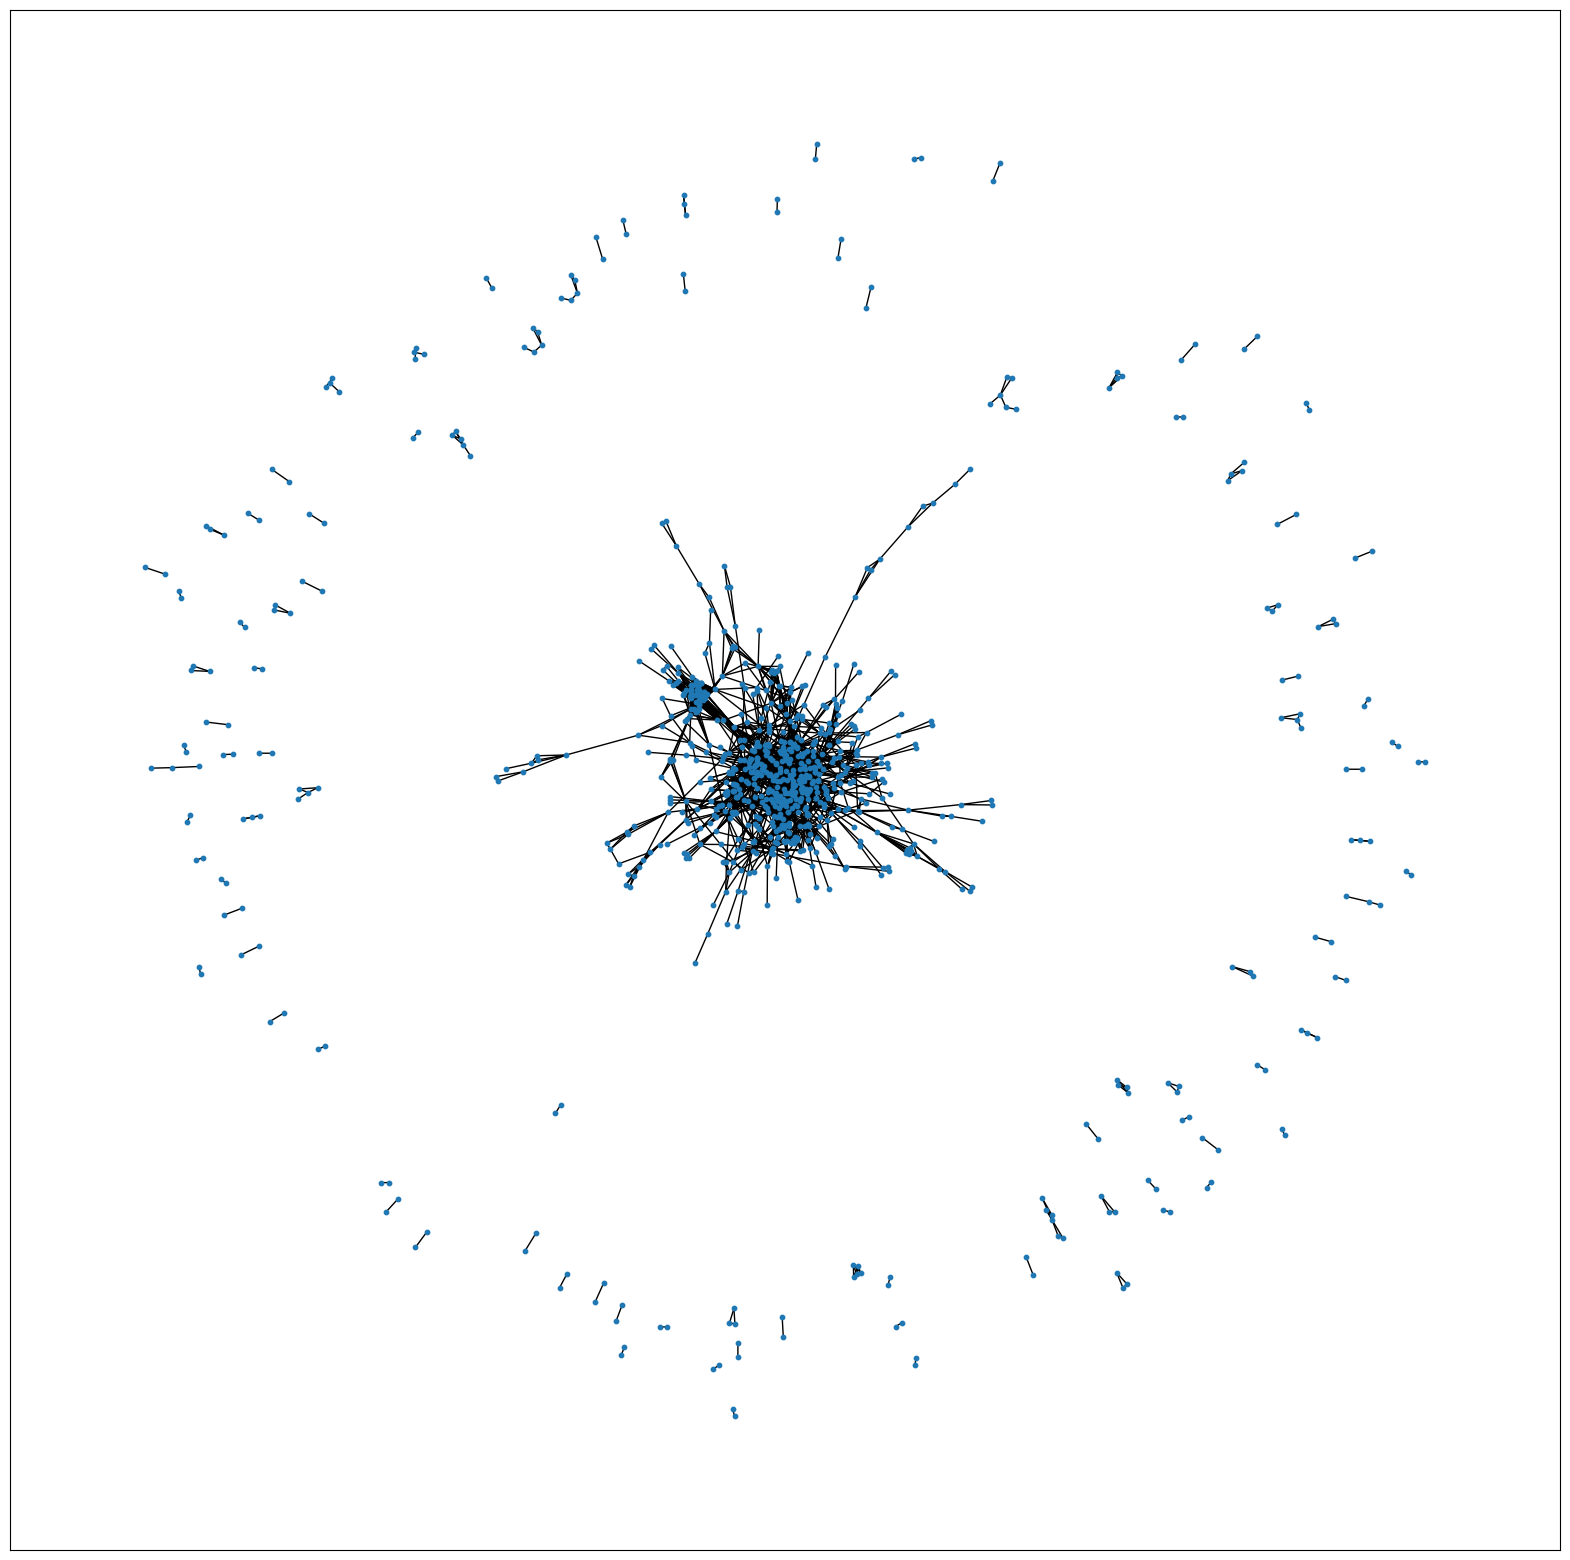

In [391]:
# Create a graph from the co_investment_counts DataFrame
#get subset where co-investments >1
# co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
plt.savefig('graphs/co_investments_active_angels.png')
plt.show()
#save plot as png




In [392]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['shareholder_name_mapped_x']
target = co_investment_counts['shareholder_name_mapped_y']
weight = co_investment_counts['CoInvestments']


adjmat = vec2adjmat(source, target, weight=weight)
print(adjmat)
# Initialize
d3 = d3graph()

d3.graph(adjmat)
# save as graph.html in dataframes
d3.show('dataframes/graph.html')
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graphs/graph_active_angels_mor_than_one_SH.html')


[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!


target                                    5W_Tech_Ventures_UG_(haftungsbeschränkt)  \
source                                                                               
5W_Tech_Ventures_UG_(haftungsbeschränkt)                                       0.0   
7gen_Holdings_GmbH                                                             0.0   
8eyes_GmbH                                                                     0.0   
A06_Ventures_UG_(haftungsbeschränkt)                                           0.0   
ADVINOS_GmbH                                                                   0.0   
...                                                                            ...   
transloid_GmbH                                                                 0.0   
ueGei_Capital_UG_(haftungsbeschränkt)                                          0.0   
whiletrue_GmbH                                                                 0.0   
wrapall_UG_(haftungsbeschränkt)                       

[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [118] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 902
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmp4c9jgm7l/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmp4c9jgm7l/d3graph.html]
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graphs/graph_active_angels_mor_than_one_SH.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graphs/graph_a

## **Descriptive Statistics** - 2

Descriptive Statistics on Angels

In [393]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

# calculate share of female angels
share_of_female_angels = number_of_female_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[3] = ["share_of_female_angels_total", share_of_female_angels]

#calculate share of male angels
share_of_male_angels = number_of_male_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[4] = ["share_of_male_angels_total", share_of_male_angels]

#cast column number of age to integer
df_angels['age'] = pd.to_numeric(df_angels['age'], errors='coerce').fillna(1).astype(int)
#calculate mean of age for all angels where age is not 0
df_angels_mf = df_angels[df_angels['age'] != 1]
mean_age_of_all_angels = df_angels_mf['age'].mean()
df_angel_descriptive.loc[5] = ["mean_age_of_all_angels", mean_age_of_all_angels]

#Calculate mean age of female angels
df_female_angels = df_angels[df_angels['gender']=='female']
mean_age_of_female_angels = df_female_angels['age'].mean()
df_angel_descriptive.loc[6] = ["mean_age_of_all_female_angels", mean_age_of_female_angels]

#Calculate mean age of male angels
df_male_angels = df_angels[df_angels['gender']=='male']
mean_age_of_male_angels = df_male_angels['age'].mean()
df_angel_descriptive.loc[7] = ["mean_age_of_all_male_angels", mean_age_of_male_angels]



# df_gender_unknown = df_angels[df_angels['gender'] =='unknown']
# mean_age_unknown = df_gender_unknown['age'].mean()
# df_angel_descriptive.loc[8] = ["mean_age_of_all_unknown_angels", mean_age_unknown]

#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[9] = ["total_number_of_active_angels", total_number_of_active_angels]

# Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_type'] == 'holding'])
# add them to df
df_angel_descriptive.loc[10] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_type'] == 'person'])



# add them to df
df_angel_descriptive.loc[11] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[12] = ["share_of_investments_through_holding", share_of_investments_through_holding]
# #share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[13] = ["share_of_investments_as_person", share_of_investments_as_person]

df_angel_descriptive

variable         value
0                         total_number_of_angels  19877.000000
1                          number_of_male_angels  15827.000000
2                        number_of_female_angels   2379.000000
3                   share_of_female_angels_total      0.130671
4                     share_of_male_angels_total      0.869329
5                         mean_age_of_all_angels     43.432697
6                  mean_age_of_all_female_angels     42.796974
7                    mean_age_of_all_male_angels     43.543123
9                  total_number_of_active_angels   1216.000000
10  number_of_angels_investing_through_a_holding   6017.000000
11        number_of_angels_investing_as_a_person  13859.000000
12          share_of_investments_through_holding      0.302727
13                share_of_investments_as_person      0.697273

In [394]:
df_angels_descriptive_active = pd.DataFrame(columns=("variable","value"))
i=0
#only consider active angels
df_angels_active = df_angels[df_angels['status'] == 'active']

# Calculate number of angels investing through a holding and add to df_angels_descriptive_active with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels_active[df_angels_active['investment_type'] == 'holding'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]
i=i+1
#Calculate number of angels investing as a person and add to df_angels_descriptive_active with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels_active[df_angels_active['investment_type'] == 'person'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_as_a_person", number_of_angels_investing_as_a_person]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_through_holding", share_of_investments_through_holding]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_as_person", share_of_investments_as_person]
i=i+1
# calculate age based on birthdate and add to df_angel

#cast column number of age to integer
df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)

#calculate mean age of angels and add to df_angels_descriptive_active with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels_active['age'].mean()

# add them to df
df_angels_descriptive_active.loc[i] = ["mean_age_of_active_angels", mean_age_of_angels]
i=i+1
#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels_active[df_angels_active['gender'] == 'male'])
df_angels_descriptive_active.loc[i] = ["number_of_male_angels_active", number_of_male_angels_active]
i=i+1
#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels_active[df_angels_active['gender'] == 'female'])
df_angels_descriptive_active.loc[i] = ["number_of_female_angels_active", number_of_female_angels_active]
i=i+1

#calculate share of female angels
share_of_female_angels_active = number_of_female_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels female", share_of_female_angels_active]
i=i+1
#calculate share of male angels
share_of_male_angels_active = number_of_male_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels male", share_of_male_angels_active]
i=i+1
#Calculate average number of investment per active angel and add to df_angels_descriptive_active with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].mean()
# add them to df
df_angels_descriptive_active.loc[i] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]
i=i+1
#Calculate median number of investment per active angel and add to df_angels_descriptive_active with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].median()
# add them to df
df_angels_descriptive_active.loc[i] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]
i=i+1


# #Calculate average inustry_HHI per active angel and add to df_angels_descriptive_active with variable name "average_inustry_HHI_per_active_angel"
# average_inustry_HHI = df_angels_active['industry_HHI'].mean()
# # add them to df
# df_angels_descriptive_active.loc[12] = ["average_industry_HHI", average_inustry_HHI]

# #Calculate average industry HHI across angels and add to df_angels_descriptive_active with variable name "average_industry_HHI_across_angels"
# average_industry_HHI_across_angels = df_angels_active['industry_HHI_angel'].mean()
# # add them to df
# df_angels_descriptive_active.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

# #Calculate average eigenvector centrality across angels and add to df_angels_descriptive_active with variable name "average_eigenvector_centrality_across_angels"
# average_eigenvector_centrality_across_angels = df_angels_active['eigenvector_centrality'].mean()
# # add them to df
# df_angels_descriptive_active.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angels_descriptive_active

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/780888892.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)


variable        value
0   number_of_active_angels_investing_through_a_ho...   794.000000
1       number_of_active_angels_investing_as_a_person   422.000000
2                share_of_investments_through_holding     0.652961
3                      share_of_investments_as_person     0.347039
4                           mean_age_of_active_angels    44.078947
5                        number_of_male_angels_active  1052.000000
6                      number_of_female_angels_active    81.000000
7                       share of active angels female     0.071492
8                         share of active angels male     0.928508
9      average_number_of_investments_per_active_angel     2.498355
10      median_number_of_investments_per_active_angel     2.000000

In [395]:
df_active_angels

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70              NaN                          NaN             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich stuttgart leipzig cologne frankfurt hamburg other  \
23     ...    0.0       0.0     0.0     0.0       0.0     1.0   0.0   
51     ...    1.0       0.0     0.0     0.0       0.0     0.0   0.0   
70     ...    0.0       0.0     0.0     1.0       0.0     0.0   1.0   
88     ...    0.0       0.0     0.0     2.0       0.0     0.0   0.0   
90     ...    0.0       0.0     0.0     0.0       0.0     0.0   0.0   
...    ... 

In [396]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/534735378.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['industry_HHI'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/534735378.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['region_HHI'] = df_angels_active[['

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70              NaN                          NaN             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... leipzig cologne frankfurt hamburg other international mannheim  \
23     ...     0.0     0.0       0.0     1.0   0.0           0.0      0.0   
51     ...     0.0     0.0       0.0     0.0   0.0           0.0      0.0   
70     ...     0.0     1.0       0.0     0.0   1.0           0.0      0.0   
88     ...     0.0     2.0       0.0     0.0   0.0           0.0      0.0   
90     ...     0.0     0.0       0.0     0.0   0.0  

In [397]:
#create df with columns variable and value
df_active_angels_descriptive_hhi = pd.DataFrame(columns=("variable","value"))
#calculate the average industry HHI for all active angels and put it into a df
average_industry_HHI = df_angels_active['industry_HHI'].mean()
average_industry_HHI
df_active_angels_descriptive_hhi.loc[0] = ["average_industry_HHI", average_industry_HHI]
#calculate the average region HHI for all active angels and put it into a df
average_region_HHI = df_angels_active['region_HHI'].mean()
average_region_HHI
df_active_angels_descriptive_hhi.loc[1] = ["average_region_HHI", average_region_HHI]

df_active_angels_descriptive_hhi    




variable     value
0  average_industry_HHI  0.624099
1    average_region_HHI  0.724584

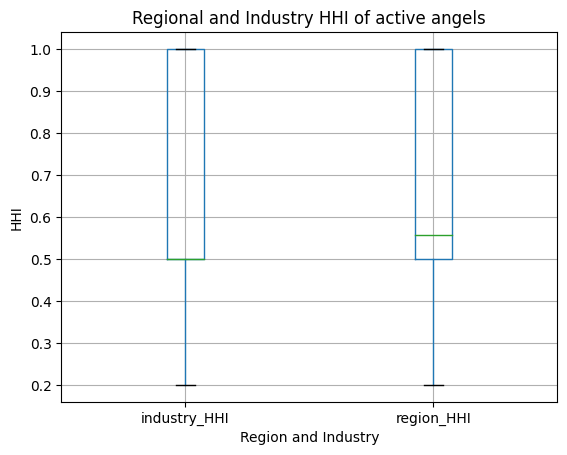

In [398]:
#plot regional and industry HHI as boxplot in one graph

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
df_angels_active.boxplot(column=['industry_HHI', 'region_HHI'], ax=ax)

# Set the title and labels
ax.set_title('Regional and Industry HHI of active angels')
ax.set_ylabel('HHI')
ax.set_xlabel('Region and Industry')

# Save the plot
plt.savefig('output/graphs/boxplot_regional_industry_HHI.png')

# Show the plot
plt.show()

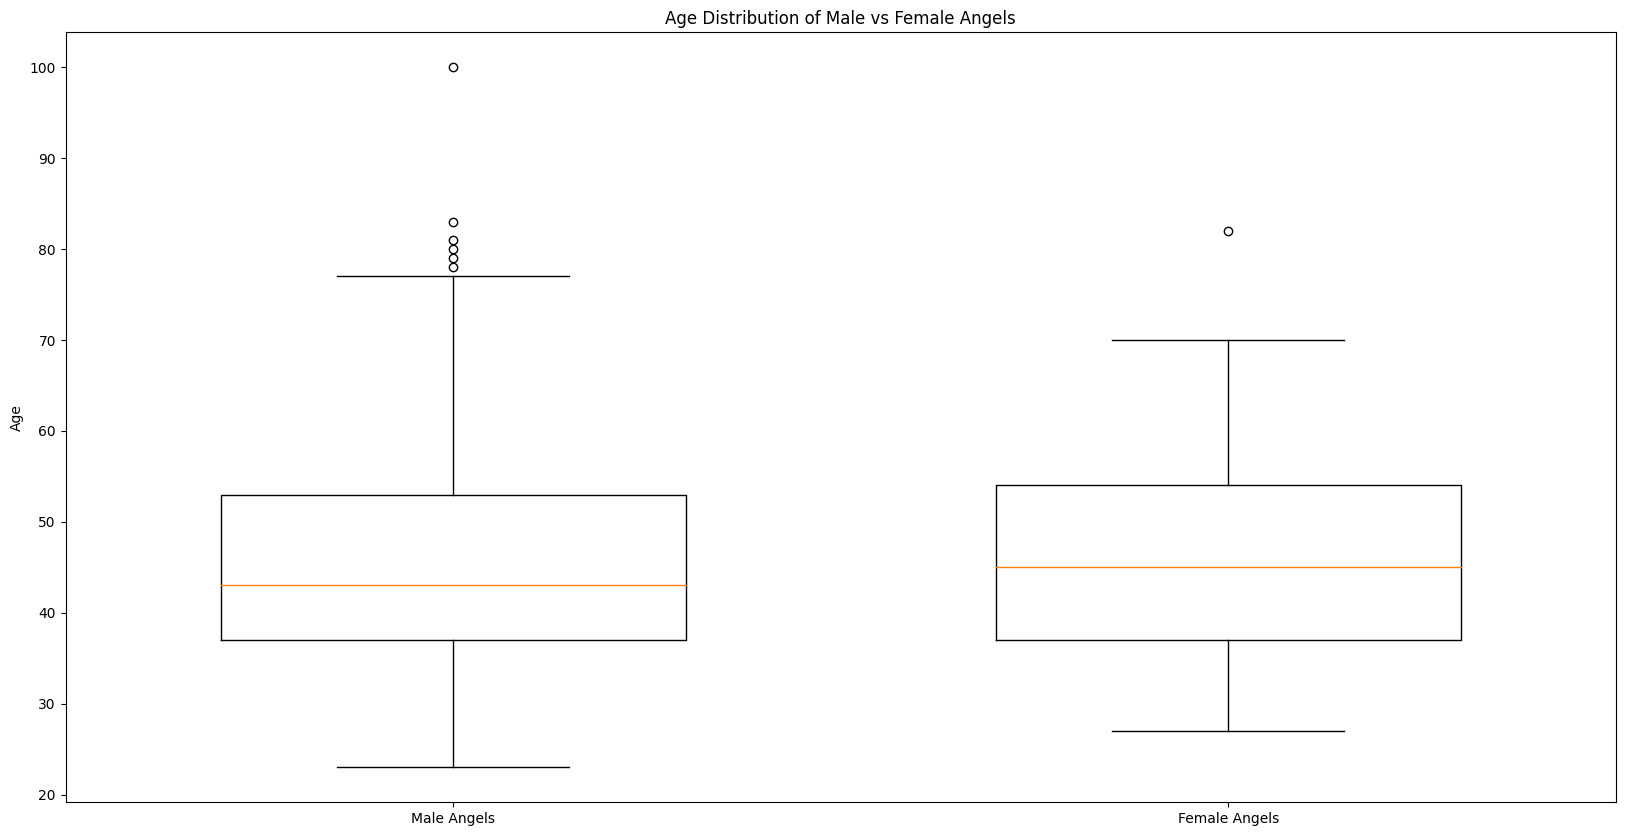

In [399]:
import matplotlib.pyplot as plt

df_angels_male = df_angels_active[df_angels_active["gender"]=='male']

df_angels_female = df_angels_active[df_angels_active['gender']=='female']

# Assuming df_angels_male and df_angels_female are your dataframes and they both have an 'age' column

# Combine the data into a list where each element is a Series/DataFrame of ages
data_to_plot = [df_angels_male['age'], df_angels_female['age']]

plt.figure(figsize=(20,10))

# Create boxplot with the combined data
# The positions parameter is optional, it sets the positions of the boxes in the plot
plt.boxplot(data_to_plot, positions=[1, 2], widths=0.6)

# Set the x-tick labels to correspond to your two categories
plt.xticks([1, 2], ['Male Angels', 'Female Angels'])

plt.title('Age Distribution of Male vs Female Angels')
plt.ylabel('Age')

# Save the figure
plt.savefig('output/boxplot_age_gender_comparison.png')

plt.show()

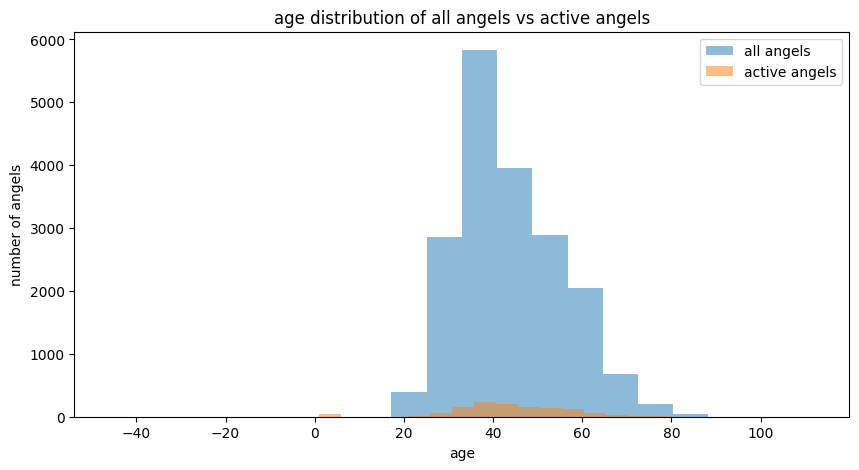

In [400]:
#plot age distribution of all angels
plt.figure(figsize=(10,5))
#drop angels with age 0
df_angels_mf = df_angels[df_angels['age'] !=1]

plt.hist(df_angels_mf['age'], bins=20, alpha=0.5, label='all angels')
plt.hist(df_angels_active['age'], bins=20, alpha=0.5, label='active angels')
plt.xlabel('age')
plt.ylabel('number of angels')
plt.legend(loc='upper right')
plt.title('age distribution of all angels vs active angels')
plt.savefig('output/graphs/age_distribution_all_vs_active_angels.png')
plt.show()

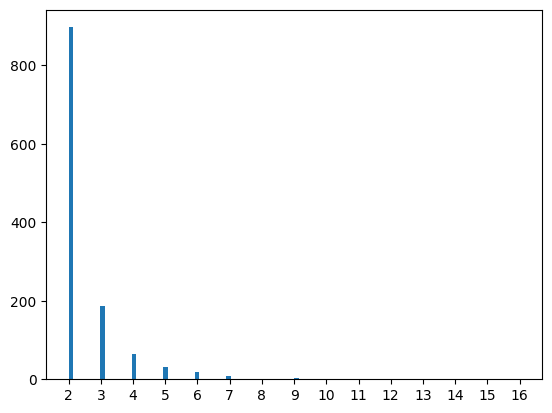

In [401]:
#Plot distribution of number of investments per angel
plt.hist(df_active_angels['number_of_investments'], bins=100)
# only plot whole numbers on x-axis
plt.xticks(np.arange(min(df_active_angels['number_of_investments']), max(df_active_angels['number_of_investments'])+1, 1.0))
#export to png as "Number of investments.png"
plt.savefig('graphs/Distribution of number of investments.png')


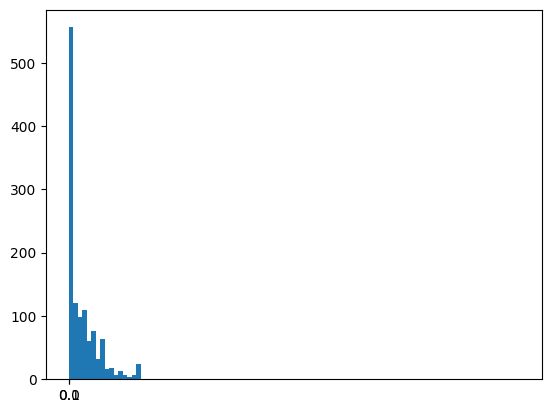

In [402]:
#plot distribution of average shares in their investments including decimals
plt.hist(df_active_angels['total_participation'], bins=100)
# plot also decimals on X-axis from 0 to 0.2
plt.xticks(np.arange(0, 0.2, 0.1))
#export to png as "Distribution of average shares of angels.png"
plt.savefig('graphs/Distribution of average shares of angels.png')


In [403]:
df_active_angels

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70              NaN                          NaN             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich stuttgart leipzig cologne frankfurt hamburg other  \
23     ...    0.0       0.0     0.0     0.0       0.0     1.0   0.0   
51     ...    1.0       0.0     0.0     0.0       0.0     0.0   0.0   
70     ...    0.0       0.0     0.0     1.0       0.0     0.0   1.0   
88     ...    0.0       0.0     0.0     2.0       0.0     0.0   0.0   
90     ...    0.0       0.0     0.0     0.0       0.0     0.0   0.0   
...    ... 

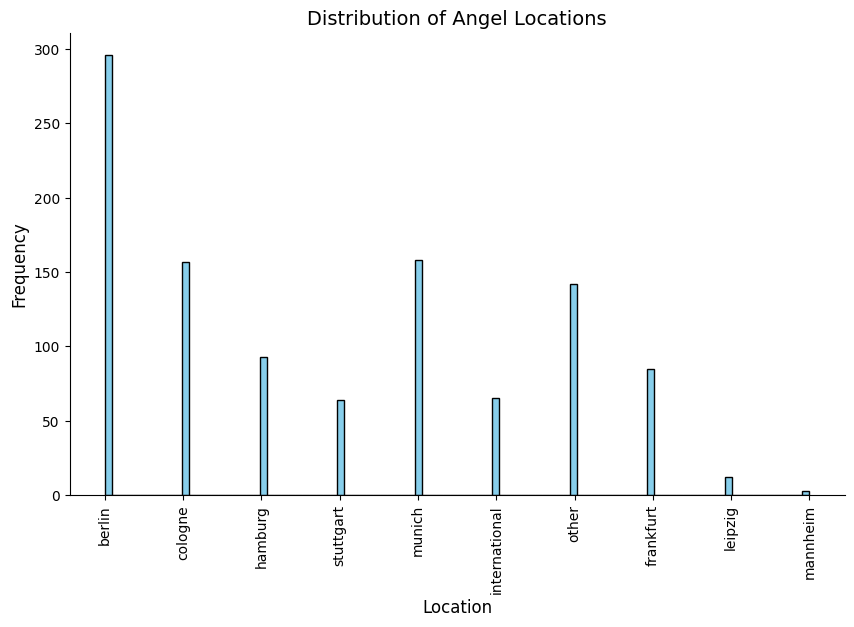

In [404]:
import matplotlib.pyplot as plt

# Drop NaN values
data = df_active_angels['region_mapping'].dropna()

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the histogram with a color
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Angel Locations', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png')

# Show the plot
plt.show()



## Descriptive Statistics on Startups

In [405]:
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))
#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1
df_startup_descriptive

#get subset of startups with more than 2 shareholders
df_startups = df_startups[df_startups['number_shareholders'] > 2]
#get subset of startups that is also in df_investment_rel_angel_startup
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
number_startups_in_dataset=len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups_in_dataset", number_startups_in_dataset]
df_startup_descriptive

variable  value
0            total_number_of_companies   8893
1  total_number_of_startups_in_dataset   1237

In [406]:
#save df_Startups to csv with name "startups_filtered.csv" and seperator ";"
df_startups.to_csv('dataframes/startups_filtered.csv', sep=";")

In [407]:
df_investment_rel_angel_startup

relation_id                     created_at  \
55          26796  2024-03-01 09:34:30.714095+00   
56          26798  2024-03-01 09:34:30.740049+00   
69           8573  2024-02-29 19:06:55.372963+00   
72           5287  2024-02-29 17:31:36.821139+00   
85           8568  2024-02-29 19:06:52.103468+00   
...           ...                            ...   
27756       13290  2024-02-29 20:17:07.298992+00   
27759       13291  2024-02-29 20:17:07.350009+00   
27762       14319  2024-02-29 20:26:54.761092+00   
27765       14322  2024-02-29 20:26:54.841165+00   
27769       21763  2024-03-01 08:45:34.689682+00   

                                        shareholder_name  \
55             Wolfpack Ventures UG (haftungsbeschränkt)   
56                               Hanse Ventures BSJ GmbH   
69     SI Development & Service GmbH mit Sitz in Bad ...   
72                                    Anyon Holding GmbH   
85                  MGH Beratungs- und Beteiligungs-GmbH   
...                                                  ...   
27756                            Dr. Dr. Alexander Weiss   
27759                                     Dr. Jan Krause   
27762                                    Benjamin Takats   
27765                                       Dennis Hauck   
27769                                        Ralph Lägel   

         shareholder_location   birthdate register_id     register_court  \
55                    Hamburg         NaN  HRB 164439            Hamburg   
56                    Hamburg         NaN  HRB 112633            Hamburg   
69     Bad Neuenahr-Ahrweiler         NaN   HRB 25590            Koblenz   
72                   Eschborn         NaN  HRB 105600  Frankfurt am Main   
85                  Wiesbaden         NaN   HRB 23398          Wiesbaden   
...                       ...         ...         ...                ...   
27756                    Köln  1974-08-25         NaN                NaN   
27759                    Köln  1976-01-28         NaN                NaN   
27762                 München  1985-08-02         NaN                NaN   
27765                 München  1979-02-19         NaN                NaN   
27769                  Berlin  1964-01-06         NaN                NaN   

      percentage_of_total_shares shareholder_type                startup_name  \
55                         48.18            angel               one.five GmbH   
56                          33.2            angel  Animal Lovers Hamburg GmbH   
69                        0.9766            angel       TiRo CheckEnergy GmbH   
72                           6.5            angel               Uniberry GmbH   
85                          0.99            angel  Mimotype Technologies GmbH   
...                          ...              ...                         ...   
27756                        NaN            angel      Hive Technologies GmbH   
27759                        NaN            angel      Hive Technologies GmbH   
27762                       23.0            angel         Affekt Digital GmbH   
27765                       20.0            angel         Affekt Digital GmbH   
27769                     1.1059            angel         Apricot Health GmbH   

       ...                shareholder_name_mapped  founding_date  \
55     ...   WESC CAPITAL UG (haftungsbeschränkt)            NaN   
56     ...                Hanse Ventures BSJ GmbH            NaN   
69     ...          SI Development & Service GmbH            NaN   
72     ...                     Anyon Holding GmbH            NaN   
85     ...  MGH Beratungs- und Beteiligungs- GmbH            NaN   
...    ...                                    ...            ...   
27756  ...                Dr. Dr. Alexander Weiss            NaN   
27759  ...                     Jan Vinzenz Krause            NaN   
27762  ...                        Benjamin Takats            NaN   
27765  ...                           Dennis Hauck            NaN   
27769  ...                

In [408]:
#calculate for each startup number_angels per startup as variable number_angels from how often shareholder_type in df_investment_rel_angel_startup is "angel"
#for each row in df_startups, count how often the startup_name occurs in df_investment_rel_angel_startup where shareholder_type is "angel"
print(len(df_investment_rel_angel_startup))
df_startups['number_angels'] = df_startups['startup_name'].map(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'].value_counts())
#get df_investment_rel_angel_startup where shareholder_type is "angel"
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'institution']

#get sum of all number of angels
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels


3038


2535

In [409]:
df_startups

startup_id                     created_at                startup_name  \
1          10856  2024-01-17 10:12:59.864646+00        Cosuno Ventures GmbH   
7           3386   2024-01-17 10:12:53.52288+00                 mipart GmbH   
13          5542  2024-01-17 10:12:55.369656+00                blonder GmbH   
17          3900  2024-01-17 10:12:54.134505+00  Guardian Technologies GmbH   
23         12526  2024-01-17 10:13:01.504395+00                Perfood GmbH   
...          ...                            ...                         ...   
8874        3191   2024-01-17 10:12:53.52288+00               FrontNow GmbH   
8880        3380   2024-01-17 10:12:53.52288+00             BeYourHero GmbH   
8881        2490  2024-01-17 10:12:52.534717+00            UMH Systems GmbH   
8883       14101  2024-01-17 10:21:45.090336+00            BringLiesel GmbH   
8890         534  2024-01-17 10:12:50.707796+00              Tilo Tech GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Laubach ...   
7                                                   NaN   
13    {"shareholders":[{"shareholder_name":"Cinto Ca...   
17    {"shareholders":[{"shareholder_name":"Anavrin ...   
23                                                  NaN   
...                                                 ...   
8874  {"shareholders":[{"shareholder_name":"Aurorum ...   
8880  {"shareholders":[{"shareholder_name":"NBK Bete...   
8881  {"shareholders":[{"shareholder_name":"Jeremy T...   
8883                                                NaN   
8890  {"shareholders":[{"shareholder_name":"MajorGro...   

                                               list_mds  number_angels  \
1     {"name":{"0":10856,"1":10856,"2":10856},"akten...              4   
7     {"name":{"0":3386},"total_MDs":{"0":1},"gegens...              3   
13    {"name":{"0":5542},"aktenzeichen":{"0":"HRB 21...              1   
17    {"name":{"0":3900},"total_MDs":{"0":1},"gegens...              1   
23                                                   {}              1   
...                                                 ...            ...   
8874  {"name":{"0":3191,"1":3191},"aktenzeichen":{"0...              3   
8880  {"name":{"0":3380,"1":3380},"total_MDs":{"0":2...              1   
8881  {"name":{"0":2490,"1":2490,"2":2490},"total_MD...              1   
8883  {"name":{"0":14101,"1":14101},"aktenzeichen":{...              1   
8890  {"name":{"0":534,"1":534,"2":534},"aktenzeiche...              2   

     startup_industry                                    startup_purpose  \
1            Bauwesen  {"gegenstand": "der Betrieb von Internet-Platt...   
7           Industrie  {"gegenstand": "Der Betrieb einer On-Demand-Ma...   
13           Bauwesen  {"gegenstand": "Die Entwicklung und Vermarktun...   
17           Bauwesen  {"gegenstand": "Forschung, Entwicklung, Produk...   
23            Medizin  {"gegenstand": "Gegenstand des Unternehmens is...   
...               ...                                                ...   
8874        eCommerce  {"gegenstand": "Der Erwerb, das Halten, die Be...   
8880     Lebensmittel  {"gegenstand": "Der Import und Export sowie di...   
8881        Industrie  {"gegenstand": "Gegenstand des Unternehmens is...   
8883        eCommerce  {"gegenstand": "Handel mit Bedarfsprodukten f\...   
8890         Software  {"gegenstand": "Entwicklung und Vertrieb von T...   

                             link_shareholder_file_2021  \
1     Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...   
7     mipart GmbH_Weiden i d OPf_HRB 5580/Liste der ...   
13    Datenflug GmbH_Berlin Charlottenburg_HRB 21647...   
17    Guardian Technologies GmbH_Mnchen_HRB 260386/L...   
23    Perfood GmbH_Lbeck_HRB 17098/Liste der Gesells...   
...                                                 ...   
8874  FrontNow GmbH_Berlin Charlottenburg_HRB 225341...   
8880  BeYourHero GmbH_Dsseldorf_HRB 91974/Liste der ...   
8881  UMH Syste

In [410]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels
#get subset of df_startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

# total_number_of_startups = len(df_startups)
# df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1

# # get subset of startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'])]

# # get subset where angel is active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']['startup_name'])]

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups", total_number_of_startups]
i=i+1
#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_shareholders'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_shareholders", average_number_of_angel_investors]
i=i+1
#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_shareholders'].median()
df_startup_descriptive.loc[i] = ["median_number_of_shareholders", median_number_of_angel_investors]
i=i+1
#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_angels'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_angels", average_number_of_angels]
i=i+1
#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_angels'].median()
df_startup_descriptive.loc[i] = ["median_number_of_angels", median_number_of_angels]
i=i+1
# #Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
# average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
# df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

# #Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
# median_number_of_active_angels = df_startups['number_of_active_angels'].median()
# df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]


df_startup_descriptive



variable        value
1        total_number_of_startups  1237.000000
2  average_number_of_shareholders     7.654002
3   median_number_of_shareholders     5.000000
4        average_number_of_angels     2.049313
5         median_number_of_angels     1.000000

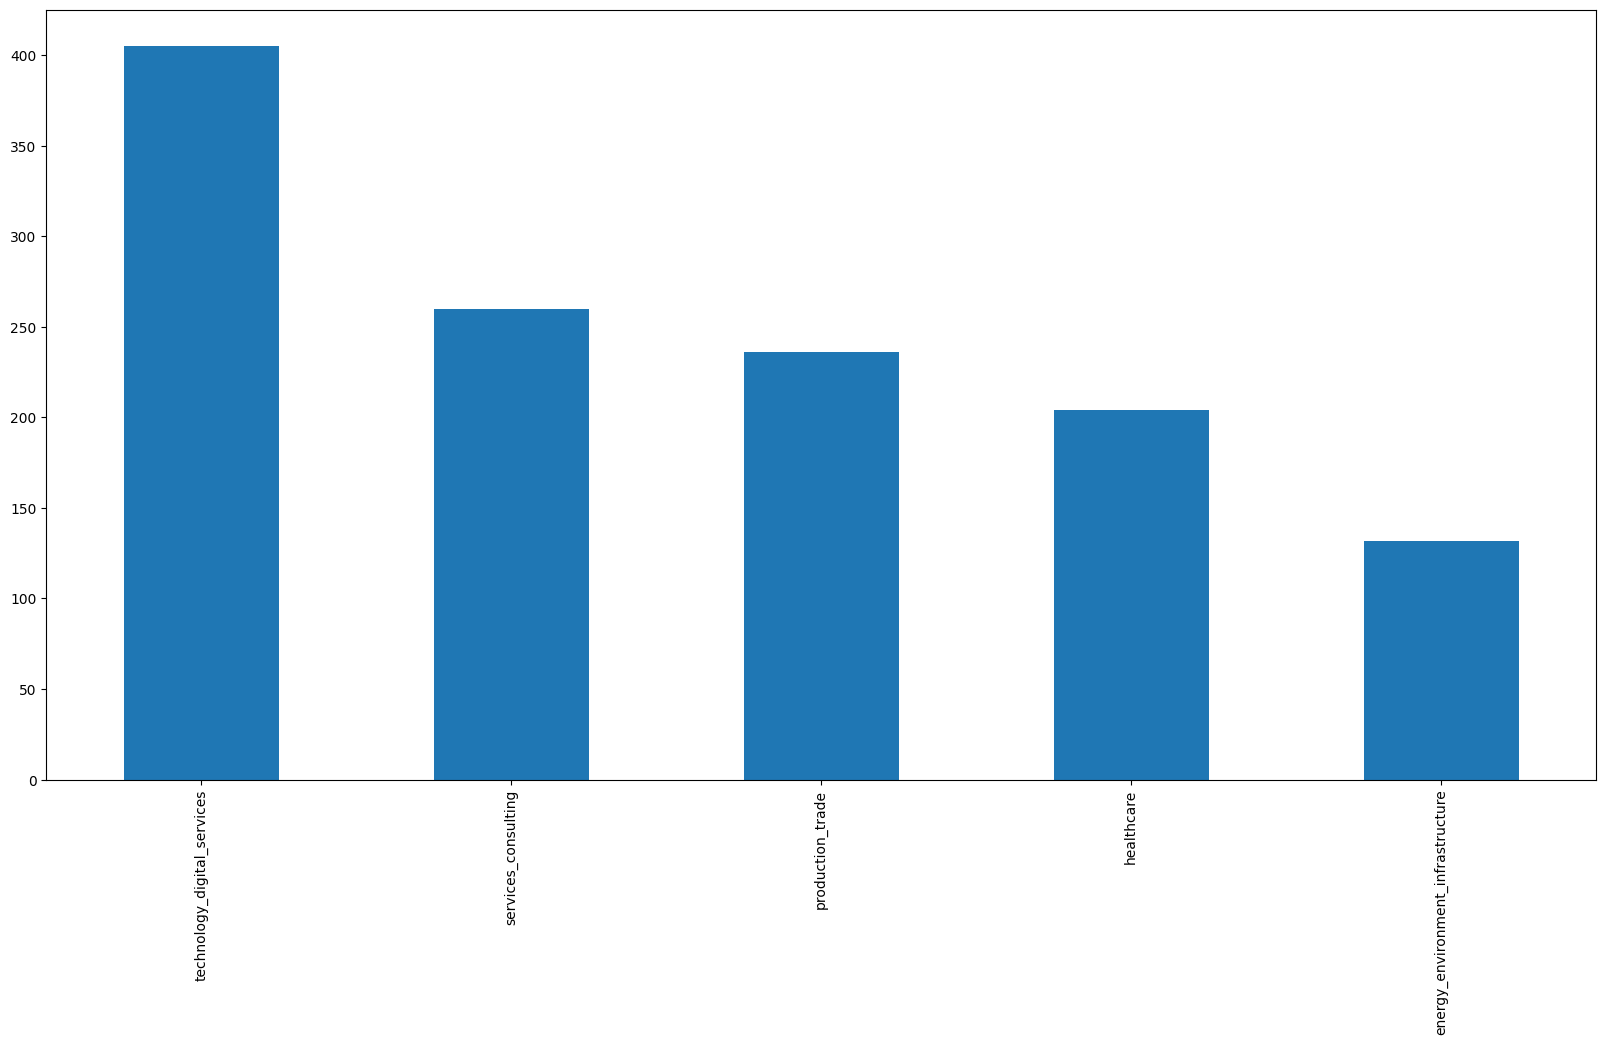

In [411]:
#Plot startups per startup_industry_mapped
plt.figure(figsize=(20,10))
#plot the number of startups per industry
df_startups['startup_industry_mapped'].value_counts().plot(kind='bar')
#plot all industries
plt.xticks(rotation=90)

#export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png')

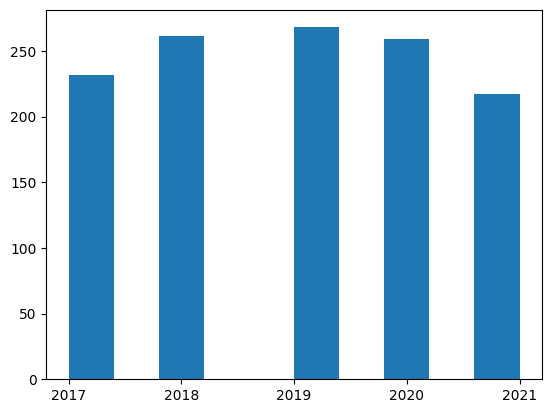

In [412]:
#add startup year_of_incorporation to df_startups based on date_incorporated
df_startups['year_of_incorporation'] = pd.to_datetime(df_startups['date_incorporated']).dt.year
#Plot startups per year of incorporation
plt.hist(df_startups['year_of_incorporation'], bins=10)
#plot all years, make 1 year jumps, no decimals, make the bars thicker
plt.xticks(np.arange(min(df_startups['year_of_incorporation']), max(df_startups['year_of_incorporation'])+1, 1.0))

#export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png')

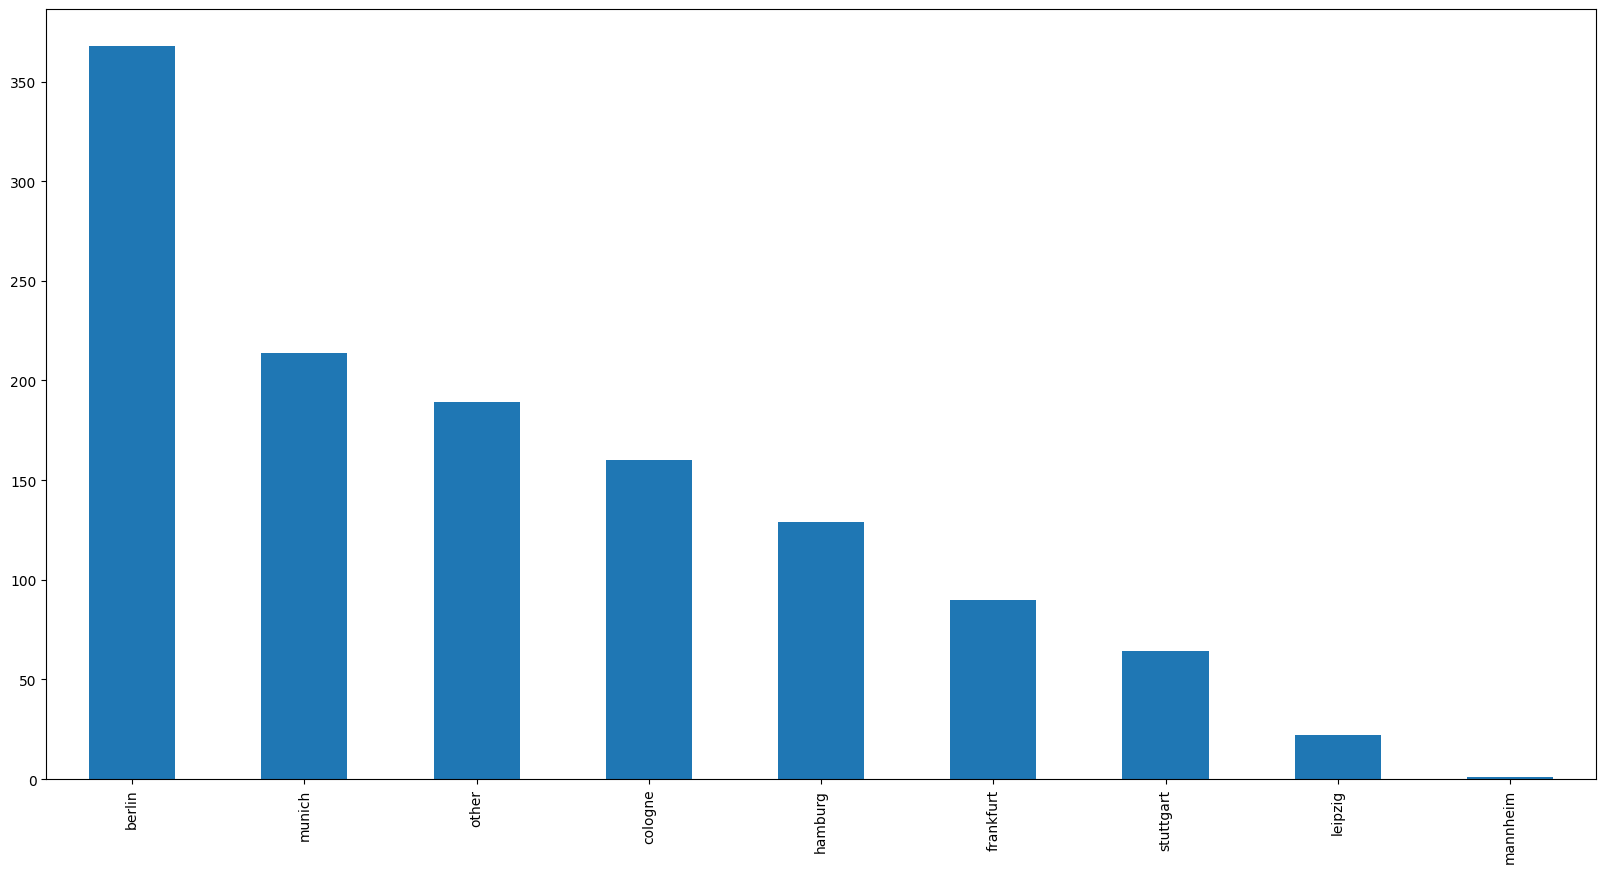

In [413]:
#plot startups per egion
plt.figure(figsize=(20,10))
#plot the number of startups per region
df_startups['region_mapping'].value_counts().plot(kind='bar')
#plot all regions
plt.xticks(rotation=90)
#export graph as image called "Number of Startups per Region.png"
plt.savefig('graphs/Number of Startups per Region.png')
plt.show()

## Network metrics



In [414]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#get subset of only active angels
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]

# #get subset of df_investment_rel_angel_startup where startup_name is part of df_startups
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


         shareholder_name_mapped_x              shareholder_name_mapped_y  \
6473                whiletrue_GmbH                      ROMM_Holding_GmbH   
5099  Roskopf_Ventures_GmbH_Berlin                      ROMM_Holding_GmbH   
4727             ROMM_Holding_GmbH                         whiletrue_GmbH   
4721             ROMM_Holding_GmbH           Roskopf_Ventures_GmbH_Berlin   
320                     Alvio_GmbH           Roskopf_Ventures_GmbH_Berlin   
...                            ...                                    ...   
2324       Gaia_Beteiligungen_GmbH  MGH_Beratungs-_und_Beteiligungs-_GmbH   
2323                    GUIDO_LANG           WILHELM_ARTUR_VINCENT_KISKER   
2322                    GUIDO_LANG         Stephan_Josef_Bernhard_Tilmann   
2321                    GUIDO_LANG                         STEFAN_SCHMÖLZ   
6499                 zero.one_GmbH                        Jonas_Altenburg   

      CoInvestments  
6473              6  
5099              6  
4727     

In [415]:
#save df_investment_rel_angel_startup as csv
df_investment_rel_angel_startup.to_csv('dataframes/df_investment_rel_angel_startup.csv', index=False)


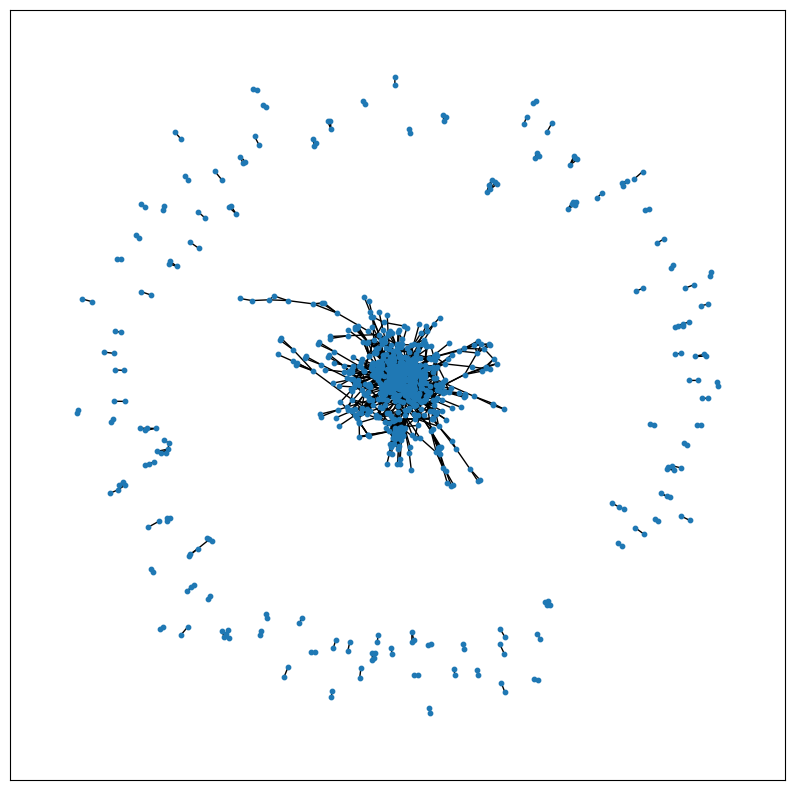

In [416]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [417]:
#get unique shareholder_ids in df_investment_rel_angel_startup
unique_shareholder_ids = df_investment_rel_angel_startup['shareholder_name_mapped'].unique()
len(unique_shareholder_ids)

1216

In [455]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]

#Calculate eigenvector centrality per angel
eigenvector_centrality = nx.eigenvector_centrality(G)
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   902.000000
1                        total_number_of_edges  3250.000000
2                               average_degree     7.206208
3                                median_degree     4.000000
4               average_clustering_coefficient     0.516773
5                median_clustering_coefficient     0.516773
8               average_eigenvector_centrality     0.007606
9                median_eigenvector_centrality     0.000018
10              average_betweenness_centrality     0.002045
11               median_betweenness_centrality     0.000005
12                average_closeness_centrality     0.120660
13                 median_closeness_centrality     0.151317
14                            average_pagerank     0.001109
15                             median_pagerank     0.001109
16  average_number_of_co_investments_per_angel     1.200923
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

In [456]:
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23                0  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70                0                            0             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
70                  0.0                                                  0   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  0.0                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... cologne_simulated leipzig_simulated production_trade_simulated  \
23     ...                 0                 0                          0   
51     ...                 0                 0                          0   
70     ...                 0                 0                          0   
88     ...                 2                 0                          0   
90     ...                 0                 0      

Average shortest path length: 4.524478621846522
Average clustering coefficient: 0.5963640942056899
Is the original graph a small-world graph? True


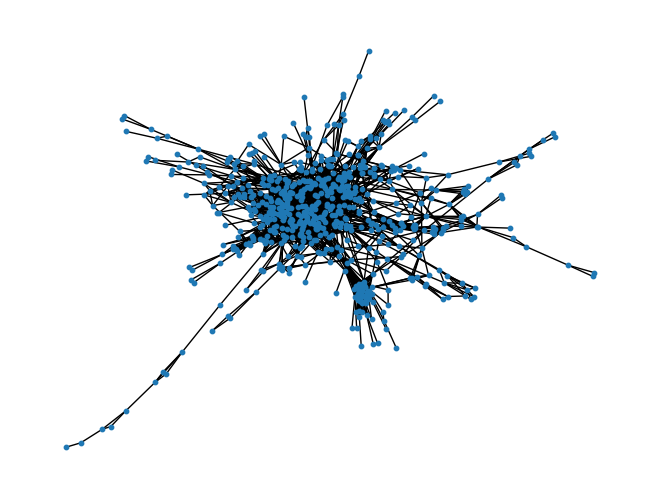

In [419]:
#check network for largest connected component
largest_cc = max(nx.connected_components(G), key=len)
import networkx as nx
#show largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)
#plot largest connected component
nx.draw(largest_cc_subgraph, with_labels=False, node_size=10, edge_color='black')


# # Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(largest_cc_subgraph)
print(f"Average shortest path length: {avg_shortest_path_length}")

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(largest_cc_subgraph)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

import numpy as np
# Create a random graph with the same number of nodes and similar number of edges, force connectedness
random_graph = nx.connected_watts_strogatz_graph(n=total_number_of_nodes, k=4, p=0.5)

# Calculate metrics for the random graph
random_avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
random_avg_clustering_coeff = nx.average_clustering(random_graph)

# Compare metrics
print(f"Is the original graph a small-world graph? {np.all([(avg_clustering_coeff > random_avg_clustering_coeff), (avg_shortest_path_length <= random_avg_shortest_path_length)])}")

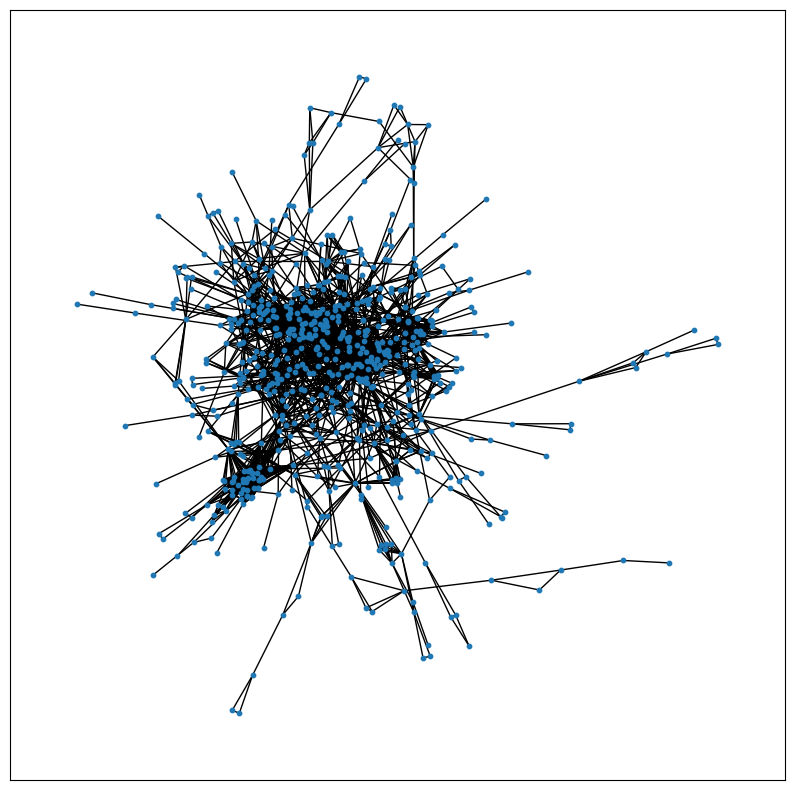

In [420]:
#plot largest subgraph
# Create a subgraph of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
#save as png
plt.savefig('graphs/largest_connected_component.png')
plt.show()


In [421]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(subgraph.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(subgraph.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   652.000000
1                        total_number_of_edges  3064.000000
2                               average_degree     9.398773
3                                median_degree     7.000000
4               average_clustering_coefficient     0.596364
5                median_clustering_coefficient     0.596364
8               average_eigenvector_centrality     0.010521
9                median_eigenvector_centrality     0.000105
10              average_betweenness_centrality     0.005422
11               median_betweenness_centrality     0.001537
12                average_closeness_centrality     0.230100
13                 median_closeness_centrality     0.235614
14                            average_pagerank     0.001534
15                             median_pagerank     0.001433
16  average_number_of_co_investments_per_angel     1.200923
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/1235243630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))


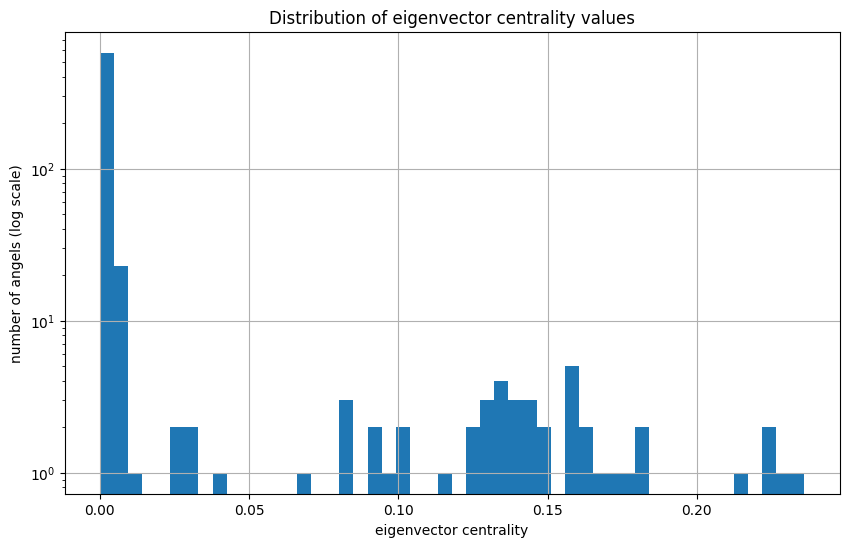

In [422]:
#plot distribution of eigenvector centrality values, start plot with 0.1 and end with 0.2
eigenvector_cebtrality_values= [v for k,v in nx.eigenvector_centrality(subgraph).items()]
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_cebtrality_values, bins=50, log=True, range=(0, max(eigenvector_cebtrality_values)))
plt.title('Distribution of eigenvector centrality values')
plt.xlabel('eigenvector centrality')
plt.ylabel('number of angels (log scale)')
plt.grid(True)

# plt.xticks(np.arange(0.2, 0.1))
# #Swap x and y axis

# #add title
# plt.title('Distribution of eigenvector centrality values')
# #add x label
# plt.xlabel('eigenvector centrality')
# #add y label
# plt.ylabel('number of angels')
# #add labels on x axis
# plt.xticks(rotation=90)
# #remove top and right spines
# plt.gca().spines['top'].set_visible(False)

# #export graph as image called "Distribution of eigenvector centrality values.png"
plt.savefig('graphs/Distribution of eigenvector centrality values.png')
plt.show()

In [423]:
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70              NaN                          NaN             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... cologne frankfurt hamburg other international mannheim  status  \
23     ...     0.0       0.0     1.0   0.0           0.0      0.0  active   
51     ...     0.0       0.0     0.0   0.0           0.0      0.0  active   
70     ...     1.0       0.0     0.0   1.0           0.0      0.0  active   
88     ...     2.0       0.0     0.0   0.0           0.0      0.0  active   
90     ...     0.0       0.0     0.0   0.0          

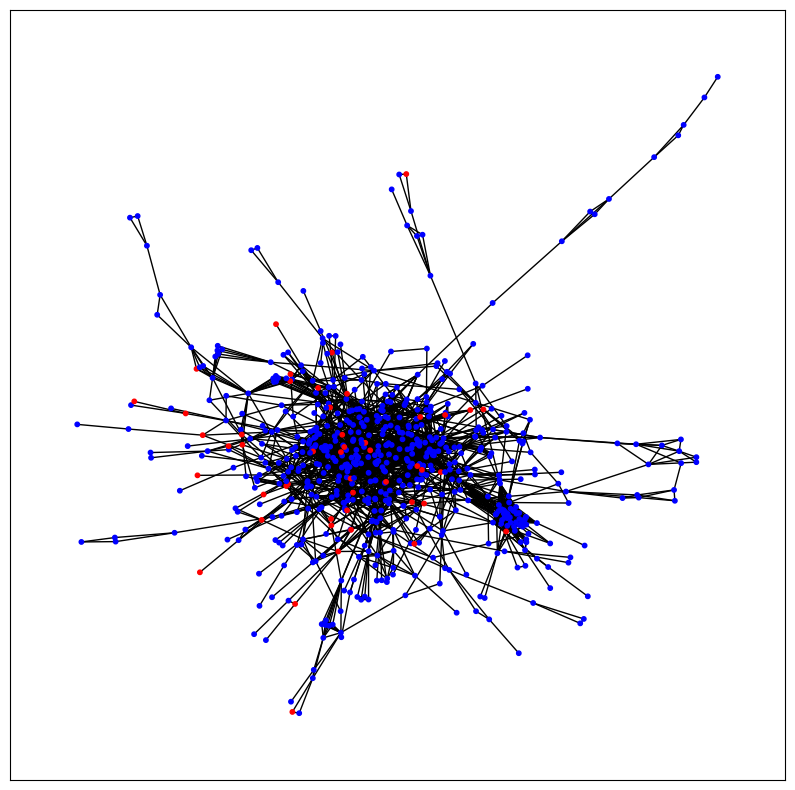

In [424]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/994784439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


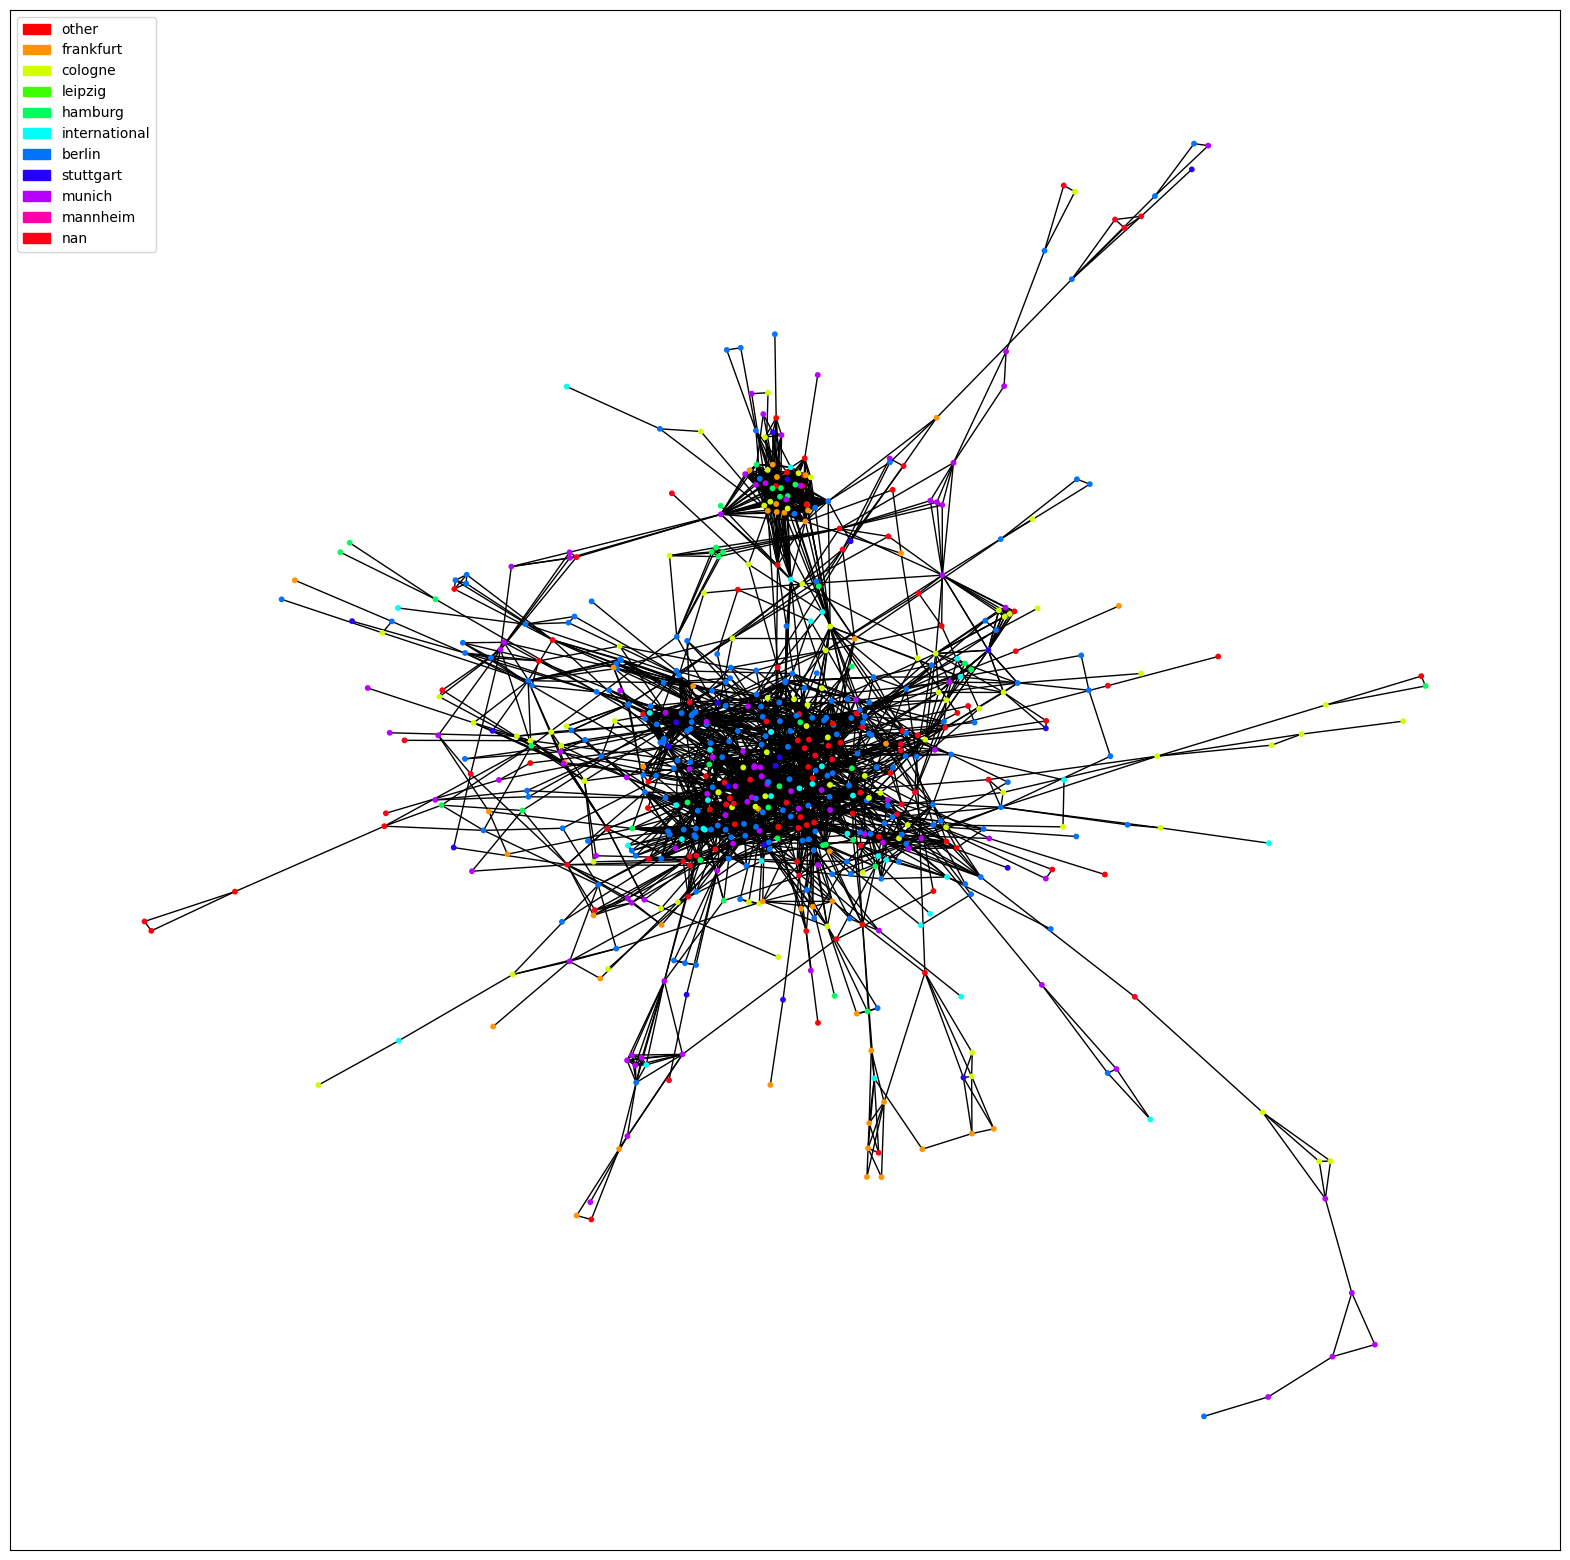

In [425]:
from matplotlib import patches


df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


In [426]:
# get subset of startups where link_si_file_current is ""
df_startups_no_link_si_file = df_startups[df_startups['link_si_file_current'].isnull()]
df_startups_no_link_si_file
#save as CSV
df_startups_no_link_si_file.to_csv('dataframes/startups_no_link_si_file.csv', sep=';')

In [427]:
df_startups

startup_id                     created_at                startup_name  \
1          10856  2024-01-17 10:12:59.864646+00        Cosuno Ventures GmbH   
7           3386   2024-01-17 10:12:53.52288+00                 mipart GmbH   
13          5542  2024-01-17 10:12:55.369656+00                blonder GmbH   
17          3900  2024-01-17 10:12:54.134505+00  Guardian Technologies GmbH   
23         12526  2024-01-17 10:13:01.504395+00                Perfood GmbH   
...          ...                            ...                         ...   
8874        3191   2024-01-17 10:12:53.52288+00               FrontNow GmbH   
8880        3380   2024-01-17 10:12:53.52288+00             BeYourHero GmbH   
8881        2490  2024-01-17 10:12:52.534717+00            UMH Systems GmbH   
8883       14101  2024-01-17 10:21:45.090336+00            BringLiesel GmbH   
8890         534  2024-01-17 10:12:50.707796+00              Tilo Tech GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Laubach ...   
7                                                   NaN   
13    {"shareholders":[{"shareholder_name":"Cinto Ca...   
17    {"shareholders":[{"shareholder_name":"Anavrin ...   
23                                                  NaN   
...                                                 ...   
8874  {"shareholders":[{"shareholder_name":"Aurorum ...   
8880  {"shareholders":[{"shareholder_name":"NBK Bete...   
8881  {"shareholders":[{"shareholder_name":"Jeremy T...   
8883                                                NaN   
8890  {"shareholders":[{"shareholder_name":"MajorGro...   

                                               list_mds  number_angels  \
1     {"name":{"0":10856,"1":10856,"2":10856},"akten...              4   
7     {"name":{"0":3386},"total_MDs":{"0":1},"gegens...              3   
13    {"name":{"0":5542},"aktenzeichen":{"0":"HRB 21...              1   
17    {"name":{"0":3900},"total_MDs":{"0":1},"gegens...              1   
23                                                   {}              1   
...                                                 ...            ...   
8874  {"name":{"0":3191,"1":3191},"aktenzeichen":{"0...              3   
8880  {"name":{"0":3380,"1":3380},"total_MDs":{"0":2...              1   
8881  {"name":{"0":2490,"1":2490,"2":2490},"total_MD...              1   
8883  {"name":{"0":14101,"1":14101},"aktenzeichen":{...              1   
8890  {"name":{"0":534,"1":534,"2":534},"aktenzeiche...              2   

     startup_industry                                    startup_purpose  \
1            Bauwesen  {"gegenstand": "der Betrieb von Internet-Platt...   
7           Industrie  {"gegenstand": "Der Betrieb einer On-Demand-Ma...   
13           Bauwesen  {"gegenstand": "Die Entwicklung und Vermarktun...   
17           Bauwesen  {"gegenstand": "Forschung, Entwicklung, Produk...   
23            Medizin  {"gegenstand": "Gegenstand des Unternehmens is...   
...               ...                                                ...   
8874        eCommerce  {"gegenstand": "Der Erwerb, das Halten, die Be...   
8880     Lebensmittel  {"gegenstand": "Der Import und Export sowie di...   
8881        Industrie  {"gegenstand": "Gegenstand des Unternehmens is...   
8883        eCommerce  {"gegenstand": "Handel mit Bedarfsprodukten f\...   
8890         Software  {"gegenstand": "Entwicklung und Vertrieb von T...   

                             link_shareholder_file_2021  \
1     Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...   
7     mipart GmbH_Weiden i d OPf_HRB 5580/Liste der ...   
13    Datenflug GmbH_Berlin Charlottenburg_HRB 21647...   
17    Guardian Technologies GmbH_Mnchen_HRB 260386/L...   
23    Perfood GmbH_Lbeck_HRB 17098/Liste der Gesells...   
...                                                 ...   
8874  FrontNow GmbH_Berlin Charlottenburg_HRB 225341...   
8880  BeYourHero GmbH_Dsseldorf_HRB 91974/Liste der ...   
8881  UMH Syste

## Simulating a network - 3



In [428]:
# #retrun df_angels_active where region_mapping is unknown
# df_angels_active[df_angels_active['region_mapping'] == 'unknown'] ="other"

# df_angels_active[df_angels_active['healthcare'].isna()]

# #drop where healthcare is na
# df_angels_active = df_angels_active.dropna(subset=['healthcare'])
# df_angels_active[df_angels_active['energy_environment_infrastructure'].isna()]
#get back where startup_industry mapped is other#get unique values in startup_region_mapping
unique_values = df_startups['region_mapping'].unique()
unique_values





array(['berlin', 'other', 'hamburg', 'munich', 'frankfurt', 'cologne',
       'stuttgart', 'leipzig', 'mannheim'], dtype=object)

In [429]:
df_angels_active['stuttgart']

23       0.0
51       0.0
70       0.0
88       0.0
90       0.0
        ... 
19815    0.0
19838    0.0
19841    0.0
19853    0.0
19866    0.0
Name: stuttgart, Length: 1216, dtype: float64

In [430]:
df_startups

startup_id                     created_at                startup_name  \
1          10856  2024-01-17 10:12:59.864646+00        Cosuno Ventures GmbH   
7           3386   2024-01-17 10:12:53.52288+00                 mipart GmbH   
13          5542  2024-01-17 10:12:55.369656+00                blonder GmbH   
17          3900  2024-01-17 10:12:54.134505+00  Guardian Technologies GmbH   
23         12526  2024-01-17 10:13:01.504395+00                Perfood GmbH   
...          ...                            ...                         ...   
8874        3191   2024-01-17 10:12:53.52288+00               FrontNow GmbH   
8880        3380   2024-01-17 10:12:53.52288+00             BeYourHero GmbH   
8881        2490  2024-01-17 10:12:52.534717+00            UMH Systems GmbH   
8883       14101  2024-01-17 10:21:45.090336+00            BringLiesel GmbH   
8890         534  2024-01-17 10:12:50.707796+00              Tilo Tech GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Laubach ...   
7                                                   NaN   
13    {"shareholders":[{"shareholder_name":"Cinto Ca...   
17    {"shareholders":[{"shareholder_name":"Anavrin ...   
23                                                  NaN   
...                                                 ...   
8874  {"shareholders":[{"shareholder_name":"Aurorum ...   
8880  {"shareholders":[{"shareholder_name":"NBK Bete...   
8881  {"shareholders":[{"shareholder_name":"Jeremy T...   
8883                                                NaN   
8890  {"shareholders":[{"shareholder_name":"MajorGro...   

                                               list_mds  number_angels  \
1     {"name":{"0":10856,"1":10856,"2":10856},"akten...              4   
7     {"name":{"0":3386},"total_MDs":{"0":1},"gegens...              3   
13    {"name":{"0":5542},"aktenzeichen":{"0":"HRB 21...              1   
17    {"name":{"0":3900},"total_MDs":{"0":1},"gegens...              1   
23                                                   {}              1   
...                                                 ...            ...   
8874  {"name":{"0":3191,"1":3191},"aktenzeichen":{"0...              3   
8880  {"name":{"0":3380,"1":3380},"total_MDs":{"0":2...              1   
8881  {"name":{"0":2490,"1":2490,"2":2490},"total_MD...              1   
8883  {"name":{"0":14101,"1":14101},"aktenzeichen":{...              1   
8890  {"name":{"0":534,"1":534,"2":534},"aktenzeiche...              2   

     startup_industry                                    startup_purpose  \
1            Bauwesen  {"gegenstand": "der Betrieb von Internet-Platt...   
7           Industrie  {"gegenstand": "Der Betrieb einer On-Demand-Ma...   
13           Bauwesen  {"gegenstand": "Die Entwicklung und Vermarktun...   
17           Bauwesen  {"gegenstand": "Forschung, Entwicklung, Produk...   
23            Medizin  {"gegenstand": "Gegenstand des Unternehmens is...   
...               ...                                                ...   
8874        eCommerce  {"gegenstand": "Der Erwerb, das Halten, die Be...   
8880     Lebensmittel  {"gegenstand": "Der Import und Export sowie di...   
8881        Industrie  {"gegenstand": "Gegenstand des Unternehmens is...   
8883        eCommerce  {"gegenstand": "Handel mit Bedarfsprodukten f\...   
8890         Software  {"gegenstand": "Entwicklung und Vertrieb von T...   

                             link_shareholder_file_2021  \
1     Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...   
7     mipart GmbH_Weiden i d OPf_HRB 5580/Liste der ...   
13    Datenflug GmbH_Berlin Charlottenburg_HRB 21647...   
17    Guardian Technologies GmbH_Mnchen_HRB 260386/L...   
23    Perfood GmbH_Lbeck_HRB 17098/Liste der Gesells...   
...                                                 ...   
8874  FrontNow GmbH_Berlin Charlottenburg_HRB 225341...   
8880  BeYourHero GmbH_Dsseldorf_HRB 91974/Liste der ...   
8881  UMH Syste

In [431]:
# Initialize an empty DataFrame to record the simulated investment relations
df_investment_rel_angel_startup_simulated = pd.DataFrame()

# Initialize a dictionary to keep track of the angels that have invested in each startup
angel_startup_map = {}
df_angels_active['number_of_simulated_investments'] = 0
# Loop through each startup
for _, startup in df_startups.iterrows():
    x = 0
    
    # Initialize an empty list for each startup to keep track of its angels
    angel_startup_map[startup['startup_name']] = []
    while x < startup['number_angels']:
        #cast to int
        df_angels_active[startup['region_mapping']] = pd.to_numeric(df_angels_active[startup['region_mapping']], errors='coerce').fillna(1).astype(int)
        # Filter angels based on the criteria: active status, minimum 1 investment in the startup's startup_industry_mapped, and same location as the startup
        
        eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (df_angels_active[startup['startup_industry_mapped']].astype(int) >= 2) &
                                    (df_angels_active[startup['region_mapping']] >= 2)&
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                    #check if number of investments is less than number of simulated investments for the respective shareholder_name
                                    & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
                                                        
        
        # If there are eligible angels
        if not eligible_angels.empty:
            # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
            # Calculate the probability of drawing each angel but have a randomness factor in it
            
            eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
            #add randomness factor
            
            # Sample an angel based on the probability
            sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                
            
            # Create a record of the investment relationship
            investment_record = pd.DataFrame({
                'startup_name': [startup['startup_name']],
                'angel': [sampled_angel.iloc[0]['shareholder_name']],  # Assuming df_angels_active has a 'shareholder_name' column
                'startup_industry_mapped': [startup['startup_industry_mapped']],  # Assuming df_startups has an 'startup_industry_mapped' column
                'region': [sampled_angel.iloc[0]['region_mapping']],  # Assuming df_angels_active has a 'location' column
                'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],  # Assuming df_angels_active has a 'total_participation' column
                'birthdate': [sampled_angel.iloc[0]['birthdate']]  # Assuming df_angels_active has a 'birthdate' column
            })
            
            # Append the record to the df_investment_rel_angel_startup DataFrame
            df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            #increase number of simulated investments where angel matches shareholder_name in df_angels_active
            df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
            

            
            # Add the angel to the list of drawn angels for the startup
            angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
            x += 1
        else:
            # If no eligible angel is left, relax the location criterion and take an angel that fulfills all criteria except location
            eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                     (df_angels_active[startup['startup_industry_mapped']].astype(int) >= 1) &
                                     (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                     & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
            if not eligible_angels.empty:
                # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
                # Calculate the probability of drawing each angel
                eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                
                # Sample an angel based on the probability
                sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    
        
                # Create a record of the investment relationship
                investment_record = pd.DataFrame({
                    'startup_name': [startup['startup_name']],
                    'angel': [sampled_angel.iloc[0]['shareholder_name']],
                    'startup_industry_mapped': [startup['startup_industry_mapped']],
                    'region': [sampled_angel.iloc[0]['region_mapping']],
                    'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                    'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                    'birthdate': [sampled_angel.iloc[0]['birthdate']]
                })
            
                # Append the record to the df_investment_rel_angel_startup DataFrame
                df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                # Add the angel to the list of drawn angels for the startup
                angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                x += 1
            else:
                # If no eligible angel is still left, take any active and eligible angel regardless of startup_industry_mapped
                eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))&
                                     #get all angels where number of simulated investments is less than number of investments
                                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]                                    
                                     
                if not eligible_angels.empty:
                    # Sample a random angel from the eligible angels
                    eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                    
                    sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    # Create a record of the investment relationship
                    investment_record = pd.DataFrame({
                        'startup_name': [startup['startup_name']],
                        'angel': [sampled_angel.iloc[0]['shareholder_name']],
                        'startup_industry_mapped': [startup['startup_industry_mapped']],
                        'region': [sampled_angel.iloc[0]['region_mapping']],
                        'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                        'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                        'birthdate': [sampled_angel.iloc[0]['birthdate']]
                    })
            
                    # Append the record to the df_investment_rel_angel_startup DataFrame
                    df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                    df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                    # Add the angel to the list of drawn angels for the startup
                    angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                    x += 1
                else:
                    print("No eligible angel left")

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/627702378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['number_of_simulated_investments'] = 0
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/627702378.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active[startup['region_mapping']] = pd.to_numeric(df_angels_active[startup['region_mapping']], errors='coerce').fillna(1).astype(int)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykerne

In [432]:
#calculate total sum of angel investors
total_number_of_angel_investors = len(df_investment_rel_angel_startup_simulated)
print(total_number_of_angel_investors)

2535


In [433]:
#create a network graph from the simulated data
# Create a new DataFrame where each row represents a co-investment
co_investments_simulated = df_investment_rel_angel_startup_simulated.merge(df_investment_rel_angel_startup_simulated, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_simulated = co_investments_simulated[co_investments_simulated['angel_x'] != co_investments_simulated['angel_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_simulated = co_investments_simulated.groupby(['angel_x', 'angel_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_simulated['angel_x'] = co_investment_counts_simulated['angel_x'].str.replace(' ', '_')
co_investment_counts_simulated['angel_y'] = co_investment_counts_simulated['angel_y'].str.replace(' ', '_')

co_investment_counts_simulated.to_csv('co_investment_counts_simulated.csv', index=False)

#sort by number of co-investments
co_investment_counts_simulated = co_investment_counts_simulated.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_simulated)




                               angel_x  \
1034      CG_Ventures_GmbH_Baiersbronn   
2885           Hanse_Ventures_BSJ_GmbH   
2888           Hanse_Ventures_BSJ_GmbH   
3106                Hübner_Invest_GmbH   
4903                    Niklas_Günther   
...                                ...   
2516  Florian_Huber_Beteiligungen_GmbH   
2514  Florian_Huber_Beteiligungen_GmbH   
2513  Florian_Huber_Beteiligungen_GmbH   
2512  Florian_Huber_Beteiligungen_GmbH   
7397                     zero.one_GmbH   

                                     angel_y  CoInvestments  
1034                 Hanse_Ventures_BSJ_GmbH              4  
2885            CG_Ventures_GmbH_Baiersbronn              4  
2888                    Dr._Stefan_Wiskemann              3  
3106            Benjamin_Günther_Invest_GmbH              3  
4903                    Dr._Stefan_Wiskemann              3  
...                                      ...            ...  
2516     Wax_Venture_UG_(haftungsbeschränkt)              1  

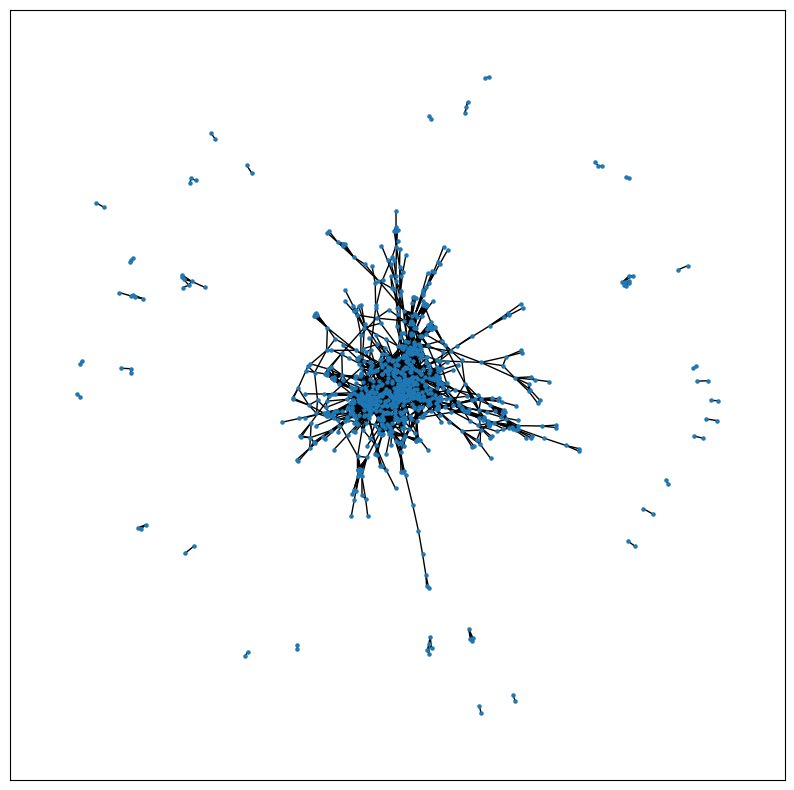

In [434]:
#plot network graph of simulated data
# Create a graph from the co_investment_counts DataFrame

G_simulated = nx.from_pandas_edgelist(co_investment_counts_simulated, 'angel_x', 'angel_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_simulated)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G_simulated, pos, with_labels=False, node_size=5, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
#save graph as png
plt.savefig('graphs/Simulated Network Graph.png')
plt.show()



/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44803/3047961543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


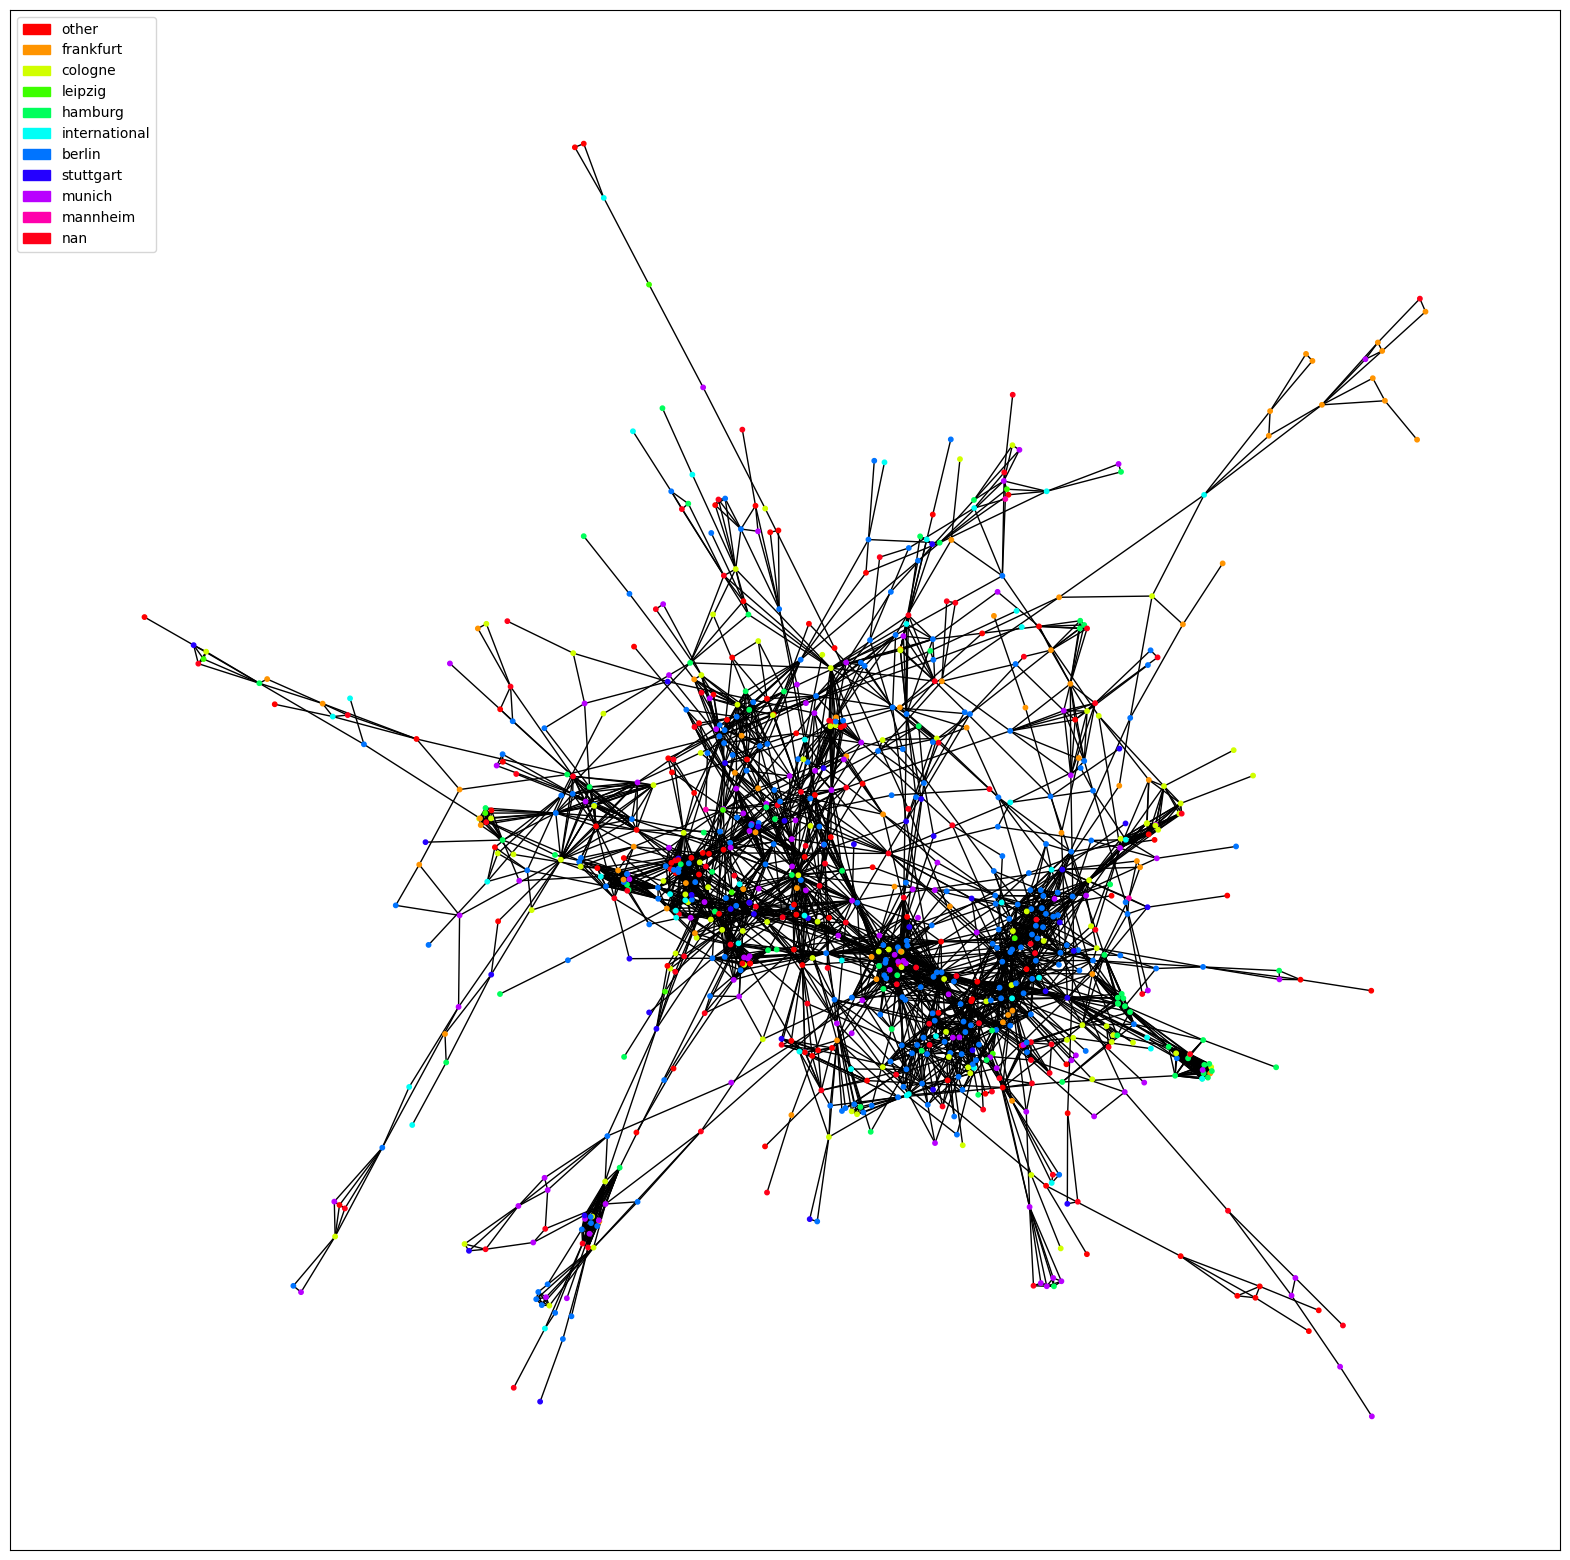

In [435]:
from matplotlib import patches

#get largest subgraph_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)

df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph_simulated.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping_simulated.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


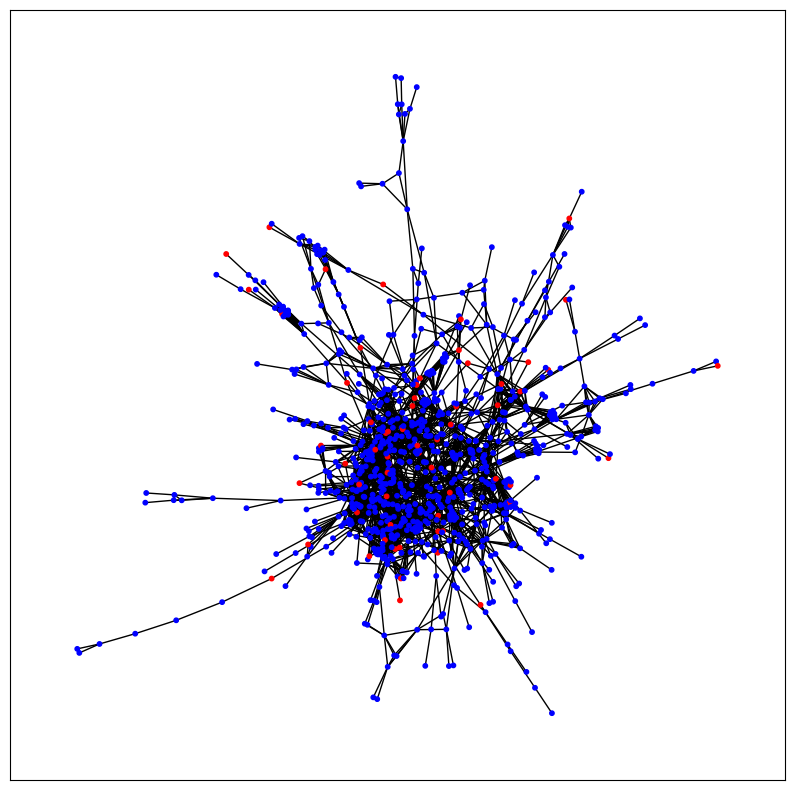

In [436]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph_simulated.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph_simulated.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

In [437]:
#Draw a network graph of active angels only
# Create a new DataFrame where each row represents a co-investment

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
# df_investment_rel_angel_startup_active = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']

co_investments_active = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_active = co_investments_active[co_investments_active['shareholder_name_mapped_x'] != co_investments_active['shareholder_name_mapped_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_active = co_investments_active.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts_active['shareholder_name_mapped_x'] = co_investment_counts_active['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts_active['shareholder_name_mapped_y'] = co_investment_counts_active['shareholder_name_mapped_y'].str.replace(' ', '_')

co_investment_counts_active.to_csv('co_investment_counts_active.csv', index=False)

#sort by number of co-investments
co_investment_counts_active = co_investment_counts_active.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_active)

         shareholder_name_mapped_x              shareholder_name_mapped_y  \
6473                whiletrue_GmbH                      ROMM_Holding_GmbH   
5099  Roskopf_Ventures_GmbH_Berlin                      ROMM_Holding_GmbH   
4727             ROMM_Holding_GmbH                         whiletrue_GmbH   
4721             ROMM_Holding_GmbH           Roskopf_Ventures_GmbH_Berlin   
320                     Alvio_GmbH           Roskopf_Ventures_GmbH_Berlin   
...                            ...                                    ...   
2324       Gaia_Beteiligungen_GmbH  MGH_Beratungs-_und_Beteiligungs-_GmbH   
2323                    GUIDO_LANG           WILHELM_ARTUR_VINCENT_KISKER   
2322                    GUIDO_LANG         Stephan_Josef_Bernhard_Tilmann   
2321                    GUIDO_LANG                         STEFAN_SCHMÖLZ   
6499                 zero.one_GmbH                        Jonas_Altenburg   

      CoInvestments  
6473              6  
5099              6  
4727     

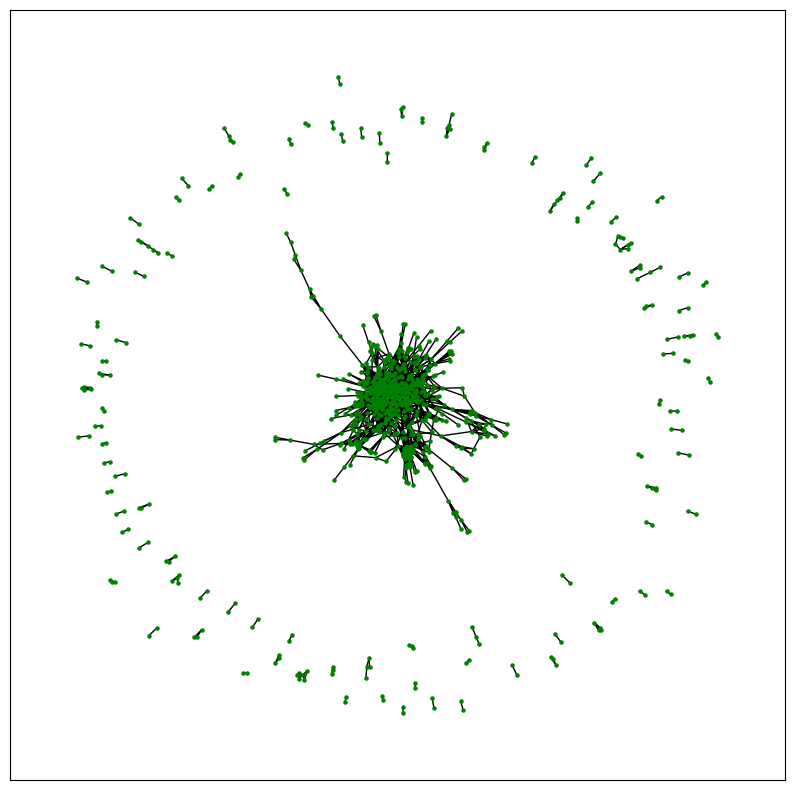

In [438]:
#plot network graph of active angels only
# Create a graph from the co_investment_counts DataFrame

G_active = nx.from_pandas_edgelist(co_investment_counts_active, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_active)
#make the graph bigger
plt.figure(figsize=(10,10))
# make nodes bigger in the graph
nx.draw_networkx(G_active, pos, with_labels=False, node_size=5, edge_color='black', node_color='green')

#Save graph as png
plt.savefig('graphs/Active Angels Network Graph.png')

## Detecting communities - 4



In [439]:
from cdlib import algorithms
import networkx as nx
import igraph as ig

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [501]:
# Was nutzen wir (angelehnt an bubna, aber deren walk trap ausgetaischt mit apparently more robus leiden algorithmus) considered
# - Leiden (von louvain zu Leiden)
# - minimum 5 community members
# - diameter of the community not larger than 1/4 of the diameter of the largest connected subgraph

#Community detection, where we remove all communitiues that are only composed of less than 5 nodes or which have a diameter larger than 1/4 of the network diameter
from cdlib import algorithms
# Create a networkx graph (replace this with your graph)
def detectCommunities(G, method):
    # Apply the Walktrap algorithm to the graph
    if method == 'walktrap':
        coms = algorithms.walktrap(G)
    if method == 'louvain':
        coms = algorithms.louvain(G)
    if method == 'leiden':
        coms = algorithms.leiden(G)
    if method == 'infomap':
        coms = algorithms.infomap(G)
    print(f"We are using the {method} algorithm to detect communities\n")

    print("The network has "+ str(G.number_of_nodes())+" nodes\n")
    print("We detected "+str(len(coms.communities))+' communities\n')

    print("The communities have those sizes respectively: \n")
    print([len(community) for community in coms.communities]) # print sizes of all remaining communities
    #remove all smaller than 5
    largest_cc = max(nx.connected_components(G), key=len)

    # Generate the subgraph of G consisting only of this component
    subgraph = G.subgraph(largest_cc)

    # Calculate and print the diameter of this subgraph
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    coms.communities = [community for community in coms.communities if nx.diameter(G.subgraph(community)) <= network_diameter / 3]
    
    coms.communities = [community for community in coms.communities if len(community) > 4]
    # #remove communities larger than 25
    # coms.communities = [community for community in coms.communities if len(community) < 25]
    print("After removing all with less than 5 community members we have "+str(len(coms.communities))+" communities left. \n")
    print(coms.communities)
    return coms.communities


def comparison(G):
    communities_walktrap = detectCommunities(G,'walktrap')
    communities_louvain = detectCommunities(G,'louvain')
    communities_leiden = detectCommunities(G,'leiden')
    communities_infomap = detectCommunities(G,'infomap')

    # Create df that compares the number of communities across the different methods
    df_community_comparison = pd.DataFrame(columns=("method","number_of_communities"))
    df_community_comparison.loc[0] = ["walktrap", len(communities_walktrap)]
    df_community_comparison.loc[1] = ["louvain", len(communities_louvain)]
    df_community_comparison.loc[2] = ["leiden", len(communities_leiden)]
    df_community_comparison.loc[3] = ["infomap", len(communities_infomap)]
    return df_community_comparison

# comparison_g_active = comparison(G_active)
# comparison_g_simulated = comparison(G_simulated)

# #Same thing for simulated data

# # Create a networkx graph (replace this with your graph)
print(comparison_g_active)
print(comparison_g_simulated)


     method  number_of_communities
0  walktrap                     33
1   louvain                      9
2    leiden                      9
3   infomap                     49
     method  number_of_communities
0  walktrap                     44
1   louvain                      7
2    leiden                      7
3   infomap                     68


We are using the walktrap algorithm to detect communities

The network has 652 nodes

We detected 86 communities

The communities have those sizes respectively: 

[106, 52, 41, 28, 24, 21, 16, 15, 14, 14, 12, 12, 11, 11, 10, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]


After removing all with less than 5 community members we have 33 communities left. 

[['Oliver_Diezmann', 'Matthias_Urlichs', 'DIRK_BREITBACH', 'Sidus_GmbH', 'WOLFGANG_SCHMIDT', 'JAN_ARNE_TEGTMEIER', 'Christian_Orsinger', 'DR._MARTIN_HECKER', 'GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)', 'GUIDO_LANG', 'STEFAN_SCHMÖLZ', 'ULRICH_CHRISTOPH_HEINRICH_HELLBERG', 'Dr._Joachim_Maus', 'AMT_Investments_GmbH', 'OS_Online_Solution_GmbH', 'Dr._Karl_Daniel_Wilhelm_Kress', 'Dr._MARCUS_HEIDEMANN', 'MARCUS_HERMANN_MÜLLER-HANSCHMANN', 'BJÖRN_ERIC_GEIDEL', 'FAGROW_GmbH', 'DR._ALFRED_HEINRICH_GEORG_SPIEKER', 'Arthur_Steinmetz', 'MARKUS_RICHARD_REISINGER', 'DR._ANDREAS_MICHAEL_KOHL', 'JÖRG_ROTT', 'PASCAL_RIMBACH', 'Ralph_Müller', 'RONALD_STEFAN_HOPPMANN', 'P&S_Investments_GmbH', 'Stephan_Josef_Bernhard_Tilmann', 'JOHANNES_GERD_EDUARD_SCHRADER', 'Lutz_Kettner', 'Mark_Mailänder', 'ANKE_HALBEKANN', 'AVOVA_Holding_GmbH', 'Pascal_Rimbach', 'Albert_Johann_Karl_Schloderer', 'Auspicium_Beteiligungs_UG_(haftun

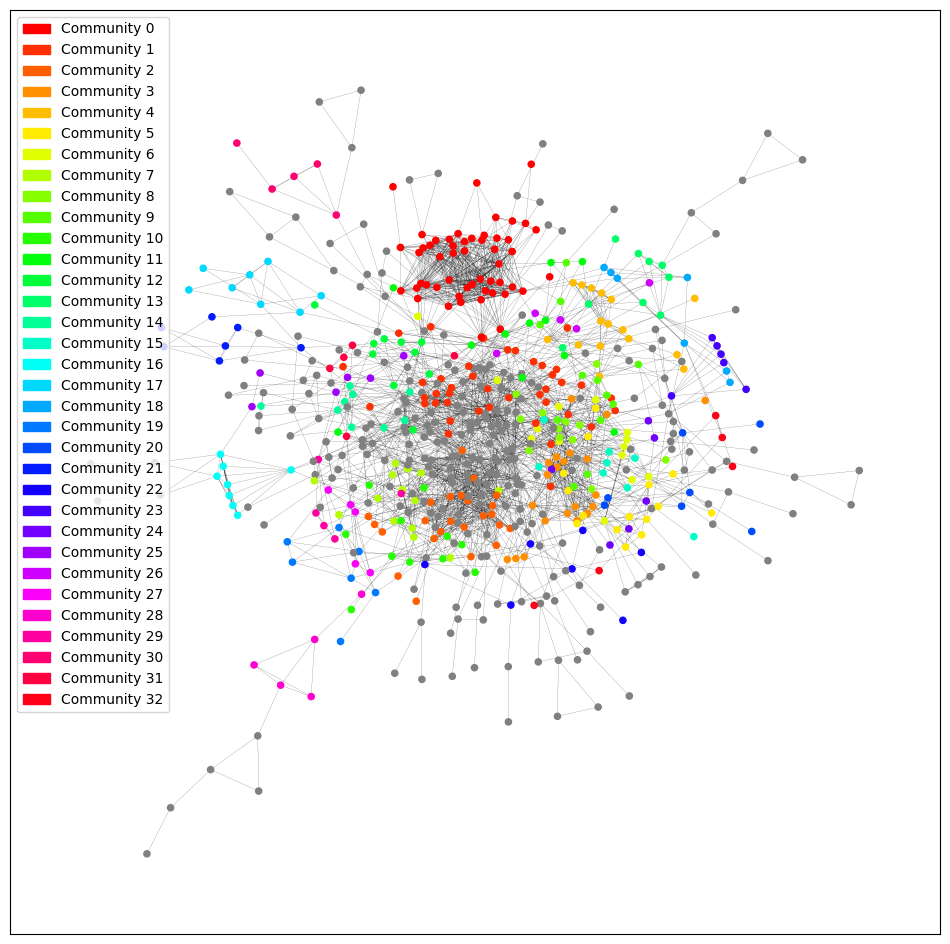

{'Next_Big_Thing_AG': 0, 'Vento_Ventures_GmbH_mit_Sitz_in_Berlin_with_registered_office_in_Berlin': 0, 'Maruhn_Budack_Values_UG_(haftungsbeschränkt)': 0, 'STEFAN_SCHMÖLZ': 0, 'Belmond_Capital_UG_(haftungsbeschränkt)': 0, 'Bornschein_&_keine_Töchter_GmbH': 0, 'Booom_Capital_GmbH': 0, 'Balios_Capital_UG_(haftungsbeschränkt)': 0, 'Ricchi_Vermögensverwaltungs_GmbH': 0, 'Open_Asset_UG_(haftungsbeschränkt)_mit_Sitz_in_Feucht': 0, 'FS_Ventures_GmbH': 0, 'Bernd_Nagel': 0, 'Brigitte_Zypries': 0, 'CJD_Capital_GmbH': 0, 'CareCap_Technology_Ventures_GmbH': 0, 'Erik_Carl_Dahl': 0, 'Jensen_GmbH': 0, 'TIC_Ventures_GmbH': 0, 'Sven_Müller': 0, 'SpinTech_UG_(haftungsbeschränkt)': 0, 'Schiabo_UG_(haftungsbeschränkt)': 0, 'RONALD_STEFAN_HOPPMANN': 0, 'Michael_Kern': 0, 'Michael_Busch': 0, 'OS_Online_Solution_GmbH': 0, 'Zoeller_invest_UG_(haftungsbeschränkt)': 0, 'Sonitus_Invest_UG_(haftungsbeschränkt)': 0, 'Julian_Hoffmann': 0, 'Aurinko_GmbH': 0, 'Arthur_Steinmetz': 0, 'AllgäuSports_WSH_GmbH_mit_dem_Sitz_

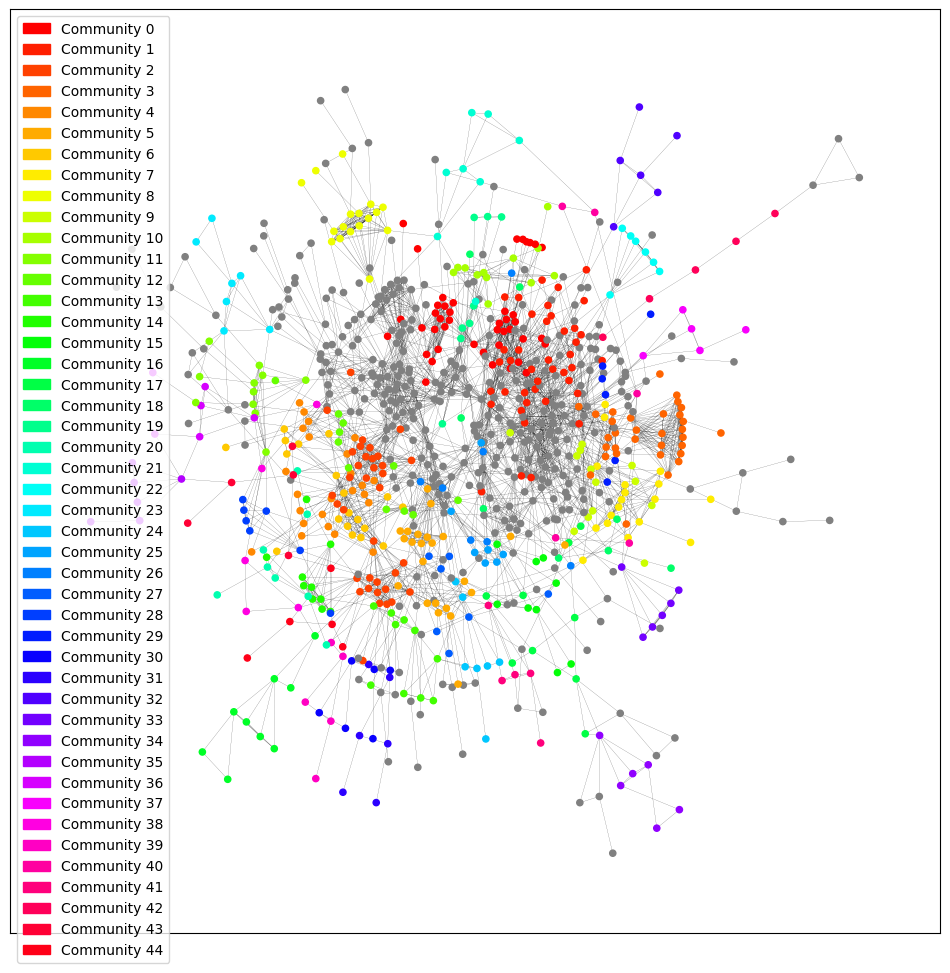

In [502]:
#get largest subgraph of G_active
largest_cc_active = max(nx.connected_components(G_active), key=len)
subgraph_active = G_active.subgraph(largest_cc_active)

#get largest subgraph of G_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def drawCommunities(G, communities):
    # Create a dictionary of community mappings
    community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}
    print(community_mapping)
    # Generate unique colors for each community
    colors = plt.cm.hsv(np.linspace(0, 1, len(communities)))
    community_colors = dict(zip(range(len(communities)), colors))

    # Create a list of node colors based on their community, if the are not in the list make it grey
    node_colors = [community_colors.get(community_mapping.get(node), 'grey') for node in G.nodes()]
    
    # Draw the graph
    pos = nx.kamada_kawai_layout(G, scale=2)  # Using Kamada-Kawai layout with increased scale
    plt.figure(figsize=(12,12))  # Increase figure size
    nx.draw_networkx(G, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color=node_colors)
    #add a legend for the communities
    # Create a legend
    patch_list = [patches.Patch(color=color, label=f'Community {community_id}') for community_id, color in community_colors.items()]
    plt.legend(handles=patch_list, loc='upper left')



    # Save as PNG
    plt.savefig('graphs/Network_graph_with_community_mapping.png')
    
    # Display the plot
    plt.show()

# Example usage, make sure detectCommunities function is defined and works correctly
communities=detectCommunities(subgraph_active, 'walktrap')
print(f"communities: {communities}")
communities_simulated = detectCommunities(subgraph_simulated, 'walktrap')

# #get subset where communities are saller than 25
# communities = [community for community in communities if len(community) < 25]
# communities_simulated = [community for community in communities_simulated if len(community) < 25]

drawCommunities(subgraph_active, communities)
drawCommunities(subgraph_simulated, communities_simulated)

In [503]:
#for each shareholder map into the df_angels_active the community they belong to
# Create a dictionary of community mappings
community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}

community_mapping_simulated = {node: community_id for community_id, community in enumerate(communities_simulated) for node in community}
# Map the community of each node to the df_angels_active DataFrame

df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)
df_angels_active['community'] = df_angels_active['community'].fillna(-1).astype(int)
df_angels_active['community_simulated'] = df_angels_active['shareholder_name'].map(community_mapping_simulated)
df_angels_active['community_simulated'] = df_angels_active['community_simulated'].fillna(-1).astype(int)
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23                0  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70                0                            0             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
70                  0.0                                                  0   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  0.0                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... leipzig_simulated production_trade_simulated  \
23     ...                 0                          0   
51     ...                 0                          0   
70     ...                 0                          0   
88     ...                 0                          0   
90     ...                 0                          2   
...    ...               ...                        ...   
19815  ...              

In [504]:
import pandas as pd

# Definition der Funktion zur Berechnung des HHI
def gender_hhi(df):
    # Zählen der Vorkommen jedes Geschlechts
    gender_counts = df['gender'].value_counts()

    
    
    #get only male and female

    # TODO
    gender_counts = gender_counts.loc[gender_counts.index.isin(['male', 'female'])]
    print(gender_counts)
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = gender_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

# Erstellen eines DataFrames mit einer Spalte 'gender'
df = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'non-binary', 'female', 'male']
})

# Berechnen des HHI für den Beispiel-DataFrame
hhi = gender_hhi(df)
print(f'Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: {hhi}')

male      3
female    3
Name: gender, dtype: int64
Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: 0.3673469387755102


In [505]:
#define function to calculate region HHI for communities
def region_hhi(df):
    
    # Zählen der Vorkommen jeder Region
    region_counts = df['region_mapping'].value_counts()
    #drop rows other
    region_counts = region_counts.drop('other', errors='ignore')
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = region_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

In [506]:
# columns for community comparison
community_columns = ["community","number_of_members","average_age","sd_eigenvector_centrality","sd_total_participation","sd_number_of_investments","sd_age","sd_industry_hhi","sd_region_hhi","gender_hhi","region_hhi_value","average_eigenvector_centrality",'female_ratio']

male      46
female     1
Name: gender, dtype: int64
0.125
male      35
female     2
Name: gender, dtype: int64
0.1998810232004759
male      20
female     3
Name: gender, dtype: int64
0.6388888888888888
male      19
female     1
Name: gender, dtype: int64
0.5941043083900227
male      13
female     3
Name: gender, dtype: int64
0.35546875
male      13
female     1
Name: gender, dtype: int64
0.2222222222222222
male      12
female     1
Name: gender, dtype: int64
0.6326530612244898
male    12
Name: gender, dtype: int64
0.22448979591836735
1.3113721705515065
male      11
female     1
Name: gender, dtype: int64
0.11805555555555555
male      9
female    1
Name: gender, dtype: int64
0.20833333333333334
male    10
Name: gender, dtype: int64
0.48760330578512395
male      8
female    2
Name: gender, dtype: int64
0.19008264462809918
male      8
female    1
Name: gender, dtype: int64
0.54
male      6
female    2
Name: gender, dtype: int64
0.4074074074074074
male      7
female    2
Name: gender, dty

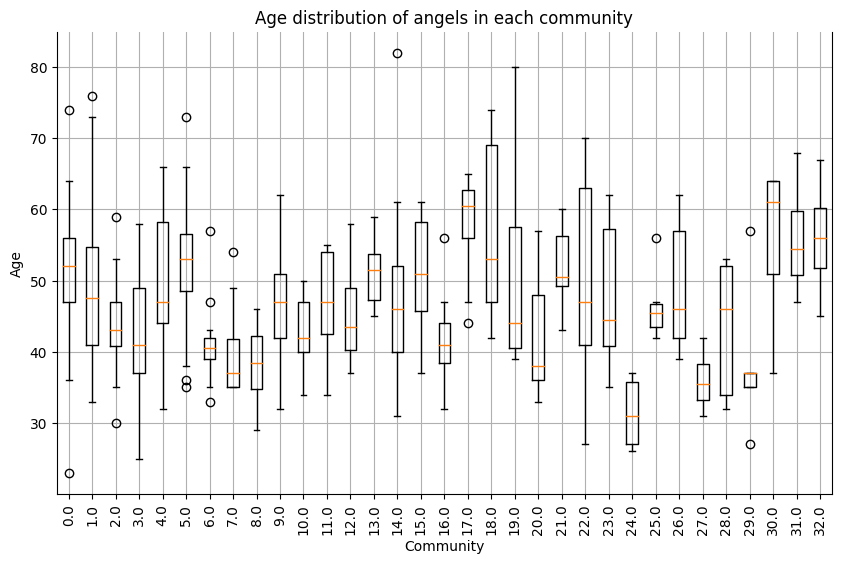

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0               52.0    51.367347               6.066113e-02   
1         1.0               41.0    48.500000               1.181784e-03   
2         2.0               24.0    43.500000               1.807222e-04   
3         3.0               21.0    42.666667               8.241802e-05   
4         4.0               16.0    50.187500               1.105477e-03   
5         5.0               15.0    51.928571               3.239687e-05   
6         6.0               14.0    41.071429               9.815978e-05   
7         7.0               14.0    39.750000               8.065281e-05   
8         8.0               12.0    38.416667               1.319039e-03   
9         9.0               12.0    46.727273               3.292590e-03   
10       10.0               11.0    42.454545               7.134403e-05   
11       11.0               11.0    46.636364               9.038813e-04   
12       12.0               10.0    45.500000               2.036483e-02   
13       13.0                9.0    51.375000               8.597758e-05   
14       14.0                9.0    48.888889               1.068316e-03   
15       15.0                8.0    50.750000               7.869137e-05   
16       16.0                8.0    42.000000               1.543083e-05   
17       17.0                8.0    57.875000               2.154459e-06   
18       18.0                7.0    57.285714               2.989552e-03   
19       19.0                7.0    51.285714               8.270194e-06   
20       20.0                7.0    42.285714               1.768055e-05   
21       21.0                7.0    51.833333               5.349290e-05   
22       22.0                7.0    50.285714               1.051459e-05   
23       23.0                6.0    47.833333               3.006256e-06   
24       24.0                6.0    31.333333               9.428986e-05   
25       25.0                6.0    46.500000               1.098057e-04   
26       26.0                5.0    49.200000               4.177287e-05   
27       27.0                5.0    36.000000               1.493976e-05   
28       28.0                5.0    43.400000               5.761833e-07   
29       29.0                5.0    38.600000               4.958094e-05   
30       30.0                5.0    55.400000               9.752261e-05   
31       31.0                5.0    56.000000               9.011954e-05   
32       32.0                5.0    56.000000               1.409009e-05   

    sd_total_participation  sd_number_of_investments     sd_age  \
0                20.125446                  1.268008   8.393186   
1                19.309590                  1.333435   9.596593   
2                11.257449                  1.903467   5.816020   
3                18.878512                  3.073698   8.696743   
4                15.960784                  0.727438   8.960794   
5                 7.286548                  1.302013  10.680423   
6                14.591639                  0.646206   5.797404   
7                13.217601                  0.650444   6.311966   
8                 8.608189                  1.311372   5.212892   
9                19.417756                  0.792961   8.556762   
10               25.967264                  0.674200   5.538296   
11                6.184838                  1.213560   7.513624   
12               20.122502                  1.549193   7.352248   
13               12.221164                  1.691482   5.475595   
14               16.175264                  1.201850  15.185885   
15                6.488359                  0.534522   8.647873   
16               14.298459                  0.744024   7.659417   
17                2.141839                  1.457738   7.972049   
18                0.411370                  1.133893  13.425278   
19                8.505100                  0.534522  16.590301   
20          

In [507]:
#build df_communities_active
df_communities_active = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    
    #Calculate SD of age
    sd_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].std()
    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].mean()
    sd_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].std()
    if community_id ==8:
        
        print(sd_number_of_investments)
    # Calculate the average eigenvector centrality of the community
    average_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].std()
    # Calculate the number of members in the community
    number_of_members = len(community)
    temp= df_angels_active[df_angels_active['community'] == community_id]
    # Calculate gender HHI
    gender_hhi_value = gender_hhi(temp)

    #Caluculate region HHI
    region_hhi_value = region_hhi(temp)
 
    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community'] == community_id]['industry_HHI'].std()
    
    #Calculate sd of region hhi
    sd_region_hhi = df_angels_active[df_angels_active['community'] == community_id]['region_HHI'].std()
    # Calculate female ratio
    female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(community)
    # Add the community to the DataFrame
    df_communities_active.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,gender_hhi_value,region_hhi_value,average_eigenvector_centrality,female_ratio]

df_communities_active

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_active['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_active['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community.png')
plt.show()

#calc average_sd_age
average_sd_age_active = df_communities_active['average_age'].mean()

df_communities_active

In [508]:
#create df_angels_active_simulated
#add_columns for each region_simulated berlin_simulated, munich_simulated, hamburg_simulated, franfurt_simulated, stuttgart_simulated, other_simulated, cologne_simulated, leipzig_simulated
df_angels_active['berlin_simulated'] = 0
df_angels_active['munich_simulated'] = 0
df_angels_active['hamburg_simulated'] = 0
df_angels_active['frankfurt_simulated'] = 0
df_angels_active['stuttgart_simulated'] = 0
df_angels_active['other_simulated'] = 0
df_angels_active['cologne_simulated'] = 0
df_angels_active['leipzig_simulated'] = 0



#count for every shareholder how many startups they are involved in per location
#create a df that counts the number of startups per shareholder per location
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot_simulated = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='region', values='count', aggfunc='sum')
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.fillna(0)
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.reset_index()
df_shareholder_relations_pivot_simulated

#now map the values from df_shareholder_relations_pivot_simulated to df_angels_active

for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    berlin_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['berlin']
    munich_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['munich']
    stuttgart_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['stuttgart']
    leipzig_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['leipzig']
    cologne_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['cologne']
    franfurt_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['frankfurt']
    hamburg_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['hamburg']
    other_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['other']
    # international = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['international']

    if len(berlin_simulated) > 0:
        df_angels_active.at[index, 'berlin_simulated'] = berlin_simulated.values[0]
    if len(munich_simulated) > 0:
        df_angels_active.at[index, 'munich_simulated'] = munich_simulated.values[0]
    if len(stuttgart_simulated) > 0:
        df_angels_active.at[index, 'stuttgart_simulated'] = stuttgart_simulated.values[0]
    if len(leipzig_simulated) > 0:
        df_angels_active.at[index, 'leipzig_simulated'] = leipzig_simulated.values[0]
    if len(cologne_simulated) > 0:
        df_angels_active.at[index, 'cologne_simulated'] = cologne_simulated.values[0]
    if len(franfurt_simulated) > 0:
        df_angels_active.at[index, 'frankfurt_simulated'] = franfurt_simulated.values[0]
    if len(hamburg_simulated) > 0:
        df_angels_active.at[index, 'hamburg_simulated'] = hamburg_simulated.values[0]
    if len(other_simulated) > 0:
        df_angels_active.at[index, 'other_simulated'] = other_simulated.values[0]
    # if len(international) > 0:
    #     df_angels_active.at[index, 'international'] = international.values[0]

df_angels_active


shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23                0  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70                0                            0             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
70                  0.0                                                  0   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  0.0                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... leipzig_simulated production_trade_simulated  \
23     ...                 0                          0   
51     ...                 0                          0   
70     ...                 0                          0   
88     ...                 0                          0   
90     ...                 0                          2   
...    ...               ...                        ...   
19815  ...              

In [509]:
#add a column to shareholders per industry production_trade_simulated technology_digital_services_simulated energy_environment_infrastructure_simulated healthcare_simulated services_consulting_simulated

df_angels_active['production_trade_simulated'] = 0
df_angels_active['technology_digital_services_simulated'] = 0
df_angels_active['energy_environment_infrastructure_simulated'] = 0
df_angels_active['healthcare_simulated'] = 0
df_angels_active['services_consulting_simulated'] = 0

#count for every shareholder how many startups they are involved in per startup_industry
#create a df_angels_active that counts the number of startups per shareholder per industry
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='startup_industry_mapped', values='count', aggfunc='sum')
df_shareholder_relations_pivot = df_shareholder_relations_pivot.fillna(0)
df_shareholder_relations_pivot = df_shareholder_relations_pivot.reset_index()
df_shareholder_relations_pivot

#now map the values from df_shareholder_relations_pivot to df_angels_active
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    production_trade_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['production_trade']
    technology_digital_services_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['technology_digital_services']
    energy_environment_infrastructure_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['energy_environment_infrastructure']
    healthcare_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['healthcare']
    services_consulting_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['services_consulting']
    if len(production_trade_simulated) > 0:
        df_angels_active.at[index, 'production_trade_simulated'] = production_trade_simulated.values[0]
    if len(technology_digital_services_simulated) > 0:
        df_angels_active.at[index, 'technology_digital_services_simulated'] = technology_digital_services_simulated.values[0]
    if len(energy_environment_infrastructure_simulated) > 0:
        df_angels_active.at[index, 'energy_environment_infrastructure_simulated'] = energy_environment_infrastructure_simulated.values[0]
    if len(healthcare_simulated) > 0:
        df_angels_active.at[index, 'healthcare_simulated'] = healthcare_simulated.values[0]
    if len(services_consulting_simulated) > 0:
        df_angels_active.at[index, 'services_consulting_simulated'] = services_consulting_simulated.values[0]

df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23                0  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70                0                            0             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
70                  0.0                                                  0   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  0.0                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... leipzig_simulated production_trade_simulated  \
23     ...                 0                          0   
51     ...                 0                          0   
70     ...                 0                          0   
88     ...                 0                          0   
90     ...                 0                          2   
...    ...               ...                        ...   
19815  ...              

In [510]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI_simulated'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI_simulated'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23                0  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70                0                            0             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
70                  0.0                                                  0   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  0.0                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... leipzig_simulated production_trade_simulated  \
23     ...                 0                          0   
51     ...                 0                          0   
70     ...                 0                          0   
88     ...                 0                          0   
90     ...                 0                          2   
...    ...               ...                        ...   
19815  ...              

In [511]:
#calculate eigenvector centrality for each angel in simulated graph
# Create a dictionary of eigenvector centralities
eigenvector_centrality_simulated = nx.eigenvector_centrality(G_simulated)

# Map the eigenvector centralities to the df_angels_active DataFrame
df_angels_active['eigenvector_centrality_simulated'] = df_angels_active['shareholder_name'].map(eigenvector_centrality_simulated)
#fill NaN values with 0
df_angels_active = df_angels_active.fillna(0)
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19815                                   Beam GmbH         3104.0   
19838                          MM Investment GmbH         6459.0   
19841  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19853        KYC Ventures UG (haftungsbeschränkt)         5096.0   
19866                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19815  2024-03-10 17:37:21.332579+00                      5            angel   
19838  2024-03-10 17:37:22.963246+00                      2            angel   
19841  2024-03-10 17:37:25.834675+00                      2            angel   
19853  2024-03-10 17:37:22.160384+00                      2            angel   
19866  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23                0  Charlottenburg HRB 159694 B              9.03500   
51       HRB 157901                     B Berlin              1.52000   
70                0                            0             21.37500   
88        HRB 17860                      Krefeld             33.33330   
90      FN 411158 w          Firmenbuch von Wien              0.48605   
...             ...                          ...                  ...   
19815  HRB 194610 B               Charlottenburg             19.59580   
19838    HRB 216984               Charlottenburg             30.00000   
19841  HRB 151510 B               Charlottenburg              1.22600   
19853  HRB 191356 B               Charlottenburg             56.76995   
19866   HRB 181720B               Charlottenburg              8.72720   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
70                  0.0                                                  0   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  0.0                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19815             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19838             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19841             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19853             217.0  {"shareholder_purpose": "der Erwerb sowie die ...   
19866             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... leipzig_simulated production_trade_simulated  \
23     ...                 0                          0   
51     ...                 0                          0   
70     ...                 0                          0   
88     ...                 0                          0   
90     ...                 0                          2   
...    ...               ...                        ...   
19815  ...              

male      37
female     2
Name: gender, dtype: int64
male      34
female     5
Name: gender, dtype: int64
male      32
female     2
Name: gender, dtype: int64
male      30
female     1
Name: gender, dtype: int64
male    24
Name: gender, dtype: int64
male      20
female     1
Name: gender, dtype: int64
male      17
female     2
Name: gender, dtype: int64
male      12
female     2
Name: gender, dtype: int64
male      13
female     2
Name: gender, dtype: int64
male      10
female     1
Name: gender, dtype: int64
male      8
female    2
Name: gender, dtype: int64
male    10
Name: gender, dtype: int64
male      8
female    2
Name: gender, dtype: int64
male    9
Name: gender, dtype: int64
male    9
Name: gender, dtype: int64
male    8
Name: gender, dtype: int64
male      6
female    2
Name: gender, dtype: int64
male    9
Name: gender, dtype: int64
male    8
Name: gender, dtype: int64
male    6
Name: gender, dtype: int64
male      7
female    1
Name: gender, dtype: int64
male      6
female   

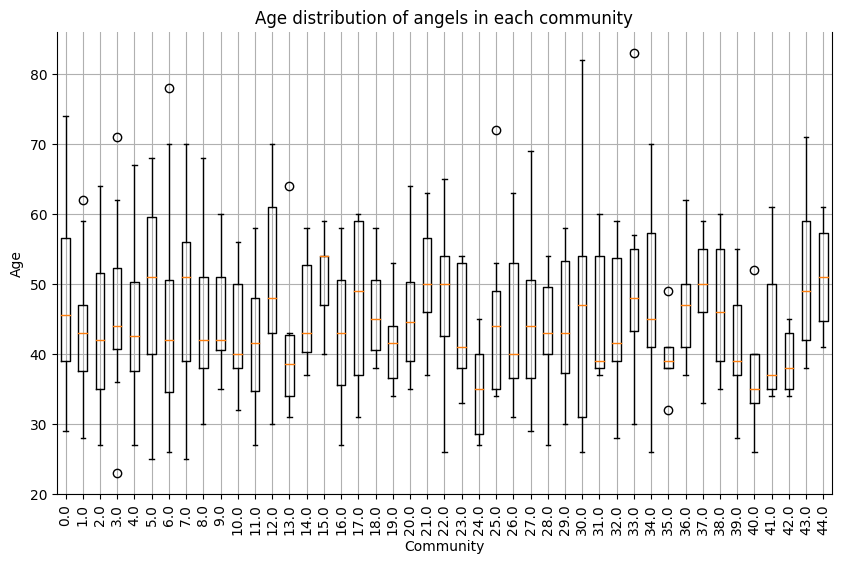

In [512]:
#build df_communities_simulated
df_communities_simulated = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities_simulated):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    sd_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].std()

    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].mean()

    sd_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].std()

    #Calculate average eigenvector centrality
    average_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality'] != 0)]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality'] != 0)]['eigenvector_centrality'].std()

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['industry_HHI'].std()

    #calculate regio hhi
    sd_region_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['region_HHI'].std()
    temp= df_angels_active[df_angels_active['community_simulated'] == community_id]
    gender_hhi_value = gender_hhi(temp)


    #Calculate region hhi
    region_hhi_value = region_hhi(temp)
    # Calculate the female_ratio of the community
    female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] =='female')])/len(community)

    # Calculate the number of members in the community
    number_of_members = len(community)
    # Add the community to the DataFrame
    df_communities_simulated.loc[community_id] = [community_id, number_of_members, average_age, sd_eigenvector_centrality,sd_total_participation,sd_number_of_investments,sd_age,sd_industry_hhi,sd_region_hhi,gender_hhi_value,region_hhi_value,average_eigenvector_centrality,female_ratio]

df_communities_simulated

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community_simulated'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_simulated['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_simulated['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community_simulated.png')
plt.show()



In [513]:
import pandas as pd
import scipy.stats as stats

# Calculate standard deviation of 'average_age' for active and simulated communities
average_sd_age_active = df_communities_active['average_age'].std()
average_sd_age_simulated = df_communities_simulated['average_age'].std()

# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_active", "mean_simulated", "sd_active", "sd_simulated"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data, simulated_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side, mean_active, mean_simulated, sd_active, sd_simulated]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_comparison, "sd_eigenvector_centrality",  df_communities_simulated['sd_eigenvector_centrality'],df_communities_active['sd_eigenvector_centrality'])


# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_comparison, "sd_number_of_investments", df_communities_simulated['sd_number_of_investments'],df_communities_active['sd_number_of_investments'] )
add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_comparison, "sd_industry_hhi",df_communities_simulated['sd_industry_hhi'], df_communities_active['sd_industry_hhi'])

#add comparison for region hhi
add_comparison_row(df_community_comparison, "sd_region_hhi",df_communities_simulated['sd_region_hhi'], df_communities_active['sd_region_hhi'])
# # Assuming 'sd_age' columns exist in your DataFrames
# add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])

#add coparison for region_hhi value
add_comparison_row(df_community_comparison, "region_hhi_value",df_communities_simulated['region_hhi_value'], df_communities_active['region_hhi_value'])

add_comparison_row(df_community_comparison, "gender_hhi",df_communities_simulated['gender_hhi'], df_communities_active["gender_hhi"])
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated


add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])
t_stat, p_value_two_tail = stats.ttest_ind(df_communities_active['female_ratio'], df_communities_simulated['female_ratio'], equal_var=False)
p_value_one_tail = p_value_two_tail / 2
print(f"One-tailed p-value for female_ratio: {p_value_one_tail}")

# Add the two-tailed test result for 'female_ratio' to the comparison DataFrame
add_comparison_row(df_community_comparison, "female_ratio", df_communities_active['female_ratio'], df_communities_simulated['female_ratio'])

df_community_comparison
# #perform t-test
# from scipy.stats import ttest_ind
# t_stat, p_value = ttest_ind(df_communities_active['sd_age'], df_communities_simulated['sd_age'])
# print(t_stat, p_value)
# # average_eigenvector_centrality_active = df_communities_active['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_active)

# # average_eigenvector_centrality_simulated = df_communities_simulated['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_simulated)
# #calculate t test between averages average_sd_age_active
# # and average_sd_age_simulated
# # from scipy.stats import ttest_ind
# # t_stat, p_value = ttest_ind(average_eigenvector_centrality_active, average_eigenvector_centrality_simulated, equal_var=False)
# # print(t_stat, p_value)

One-tailed p-value for female_ratio: 0.35619531749526345


variable    t_stat   p_value  mean_active  mean_simulated  \
0  sd_eigenvector_centrality  2.210166  0.015373     0.012425        0.002855   
1   sd_number_of_investments -3.585926  0.000371     0.539286        1.043027   
2     sd_total_participation  3.706236  0.000210    18.890845       12.596645   
3            sd_industry_hhi -2.128487  0.018270     0.173191        0.215187   
4              sd_region_hhi  3.288217  0.001002     0.252196        0.219252   
5           region_hhi_value -3.846925  0.000148     0.243893        0.364756   
6                 gender_hhi  0.558424  0.289167     0.748788        0.722605   
7                     sd_age -2.542019  0.006635     8.827859       10.657058   
8               female_ratio  0.370201  0.356195     0.089744        0.081310   

   sd_active  sd_simulated  
0   0.026068      0.010971  
1   0.464270      0.702246  
2   7.393058      7.422552  
3   0.099586      0.074659  
4   0.026155      0.053017  
5   0.118109      0.149480  
6   0.207751      0.202228  
7   3.143702      3.134402  
8   0.100991      0.097176

In [514]:
# Check if 'startup_name' is unique in df_startups
if df_startups['startup_name'].is_unique:
    # Use 'startup_name' as the index for mapping
    mapping_series = df_startups.set_index('startup_name')['changed_shareholder_structure']
    df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['startup_name'].map(mapping_series)
else:
    print("Error: 'startup_name' is not unique in df_startups.")
    # Handle the non-unique 'startup_name' here, maybe by aggregating or cleaning up

# Print the result
df_investment_rel_angel_startup

#If yes then 1 else 0
df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
#Replace all spaces in shareholder name mapped with _
df_investment_rel_angel_startup['shareholder_name_mapped'] = df_investment_rel_angel_startup['shareholder_name_mapped'].str.replace(' ', '_')

In [515]:
#add a column survival_rate to df_angels_active
df_angels_active['survival_rate'] = 0
# Calculate the survival rate for each angel
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    # Calculate the survival rate for the angel
    survival_rate = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == angel]['changed_shareholder_structure'].mean()
    
    # Add the survival rate to the DataFrame
    df_angels_active.at[index, 'survival_rate'] = survival_rate



In [516]:
#for each community calculate the average survival rate
# Create a DataFrame to store the average survival rate for each community
df_survival_rate = pd.DataFrame(columns=["community", "average_survival_rate","members"])
#get unique community value sin df_angels_active["community"]
communities = df_angels_active['community'].unique()
# Loop through each community
for community in communities:
    # Calculate the average survival rate of the community
    average_survival_rate = df_angels_active[df_angels_active['community'] == community]['survival_rate'].mean()
    # Add the community to the DataFrame

    members= len(df_angels_active[df_angels_active['community'] == community])
    df_survival_rate.loc[community] = [community, average_survival_rate,members]
#sort ascending by community
df_survival_rate = df_survival_rate.sort_values(by='community', ascending=True)
df_survival_rate

community  average_survival_rate  members
-1        -1.0               0.458247    833.0
 0         0.0               0.639423     52.0
 1         1.0               0.508943     41.0
 2         2.0               0.780688     24.0
 3         3.0               0.801587     21.0
 4         4.0               0.927083     16.0
 5         5.0               0.773333     15.0
 6         6.0               0.773810     14.0
 7         7.0               0.797619     14.0
 8         8.0               0.695833     12.0
 9         9.0               0.486111     12.0
 10       10.0               0.757576     11.0
 11       11.0               0.545455     11.0
 12       12.0               0.757143     10.0
 13       13.0               0.789683      9.0
 14       14.0               0.922222      9.0
 15       15.0               0.822917      8.0
 16       16.0               0.520833      8.0
 17       17.0               0.750000      8.0
 18       18.0               1.000000      7.0
 19       19.0               0.571429      7.0
 20       20.0               0.738095      7.0
 21       21.0               0.857143      7.0
 22       22.0               0.738095      7.0
 23       23.0               0.597222      6.0
 24       24.0               0.500000      6.0
 25       25.0               0.694444      6.0
 26       26.0               0.666667      5.0
 27       27.0               1.000000      5.0
 28       28.0               0.720000      5.0
 29       29.0               0.100000      5.0
 30       30.0               0.333333      5.0
 31       31.0               0.800000      5.0
 32       32.0               0.900000      5.0

In [517]:
#ttest for survival rate between community -1 and all others
# Perform a t-test between community -1 and all other communities
community_minus_one = df_angels_active[df_angels_active['community'] == -1]['survival_rate']
other_communities = df_angels_active[df_angels_active['community'] != -1]['survival_rate']
t_stat, p_value = stats.ttest_ind(community_minus_one, other_communities, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -11.94576734974305, p-value: 1.3128132460843978e-30


In [518]:
#Girvan Newman based community detection

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity
 

def get_communities_Girvan_Newman(G_active):
    comp = girvan_newman(G_active)
    
    max_modularity = None
    optimal_partition = None
    for communities in comp:
        new_modularity = modularity(G_active, communities)

        if max_modularity is None or new_modularity > max_modularity:
            max_modularity = new_modularity
            optimal_partition = communities

        if max_modularity is not None and new_modularity < max_modularity:
            break
    # node_groups = []
    # for com in next(communities):
    #   node_groups.append(list(com))

    optimal_partition = [c for c in optimal_partition if len(c) > 4]
    largest_cc = max(nx.connected_components(G_active), key=len)

    subgraph = G_active.subgraph(largest_cc)
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    optimal_partition = [c for c in optimal_partition if nx.diameter(G_active.subgraph(c)) < network_diameter/2]
    #transform optimal partition to list of lists
    optimal_partition = [list(c) for c in optimal_partition]
    return optimal_partition



communities_girvan_newman = get_communities_Girvan_Newman(G_active)
communities_girvan_newman_simulated = get_communities_Girvan_Newman(G_simulated)
print(communities_girvan_newman)
communities_girvan_newman
len(communities_girvan_newman)
len(communities_girvan_newman_simulated)
#return size of all communities
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes_simulated = [len(community) for community in communities_girvan_newman_simulated]   
print(community_sizes_simulated)
print(community_sizes)

KeyboardInterrupt: 

In [ ]:
print(len(communities_girvan_newman))


#get number of shareholders in each community
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes

27


[160,
 62,
 49,
 59,
 11,
 39,
 13,
 13,
 12,
 5,
 10,
 12,
 23,
 6,
 5,
 7,
 5,
 17,
 7,
 6,
 10,
 8,
 9,
 5,
 7,
 13,
 5]

In [ ]:
# Load csv angels
df_temp = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels.csv')
#rename column birthdate_x to birthdate
df_temp = df_temp.rename(columns={'birthdate_x':'birthdate'})

#save as csv
df_temp.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels_upload.csv', index=False)

## Analysis of similarity within communities - 5


In [ ]:
#calculate investments per location per angel based on input df_angel and input df_investment_rel_angel_startup
#define funtion
def investments_per_location_per_angel(df_angel, df_investment_rel_angel_startup):
    #get list of all unique angels
    # rename column angel to name
    df_angel = df_angel.rename(columns={'angel':'name'})
    df_investment_rel_angel_startup = df_investment_rel_angel_startup.rename(columns={'angel':'name'})
    angels = df_angel['name'].unique()
    #create list of all locations in df_investment_rel_angel_startup
    locations = df_investment_rel_angel_startup['startup_location'].unique()
    #in front of every location write investments_
    locations_columns = [x for x in locations+ '_investments']
    #create empty df with columns name and one column for each location
    df_investments_per_location_per_angel = pd.DataFrame(columns=['name']+locations_columns)

    #loop through all angels
    for angel in angels:
        #create empty list to store investments per location
        investments_per_location = []
        #loop through all locations
        for location in locations:
            #calculate investments per location
            investments = len(df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_location'] == location) & (df_investment_rel_angel_startup['name'] == angel)])
            #append to list
            investments_per_location.append(investments)
        #create df with name and investments per location
        df = pd.DataFrame([[angel]+investments_per_location], columns=['name']+locations_columns)
        #append to df_investments_per_location_per_angel
        df_investments_per_location_per_angel = df_investments_per_location_per_angel.append(df, ignore_index=True)


    return df_investments_per_location_per_angel

#run function
df_investments_per_location_per_angel = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup)
df_investments_per_location_per_angel_simulated = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup_simulated)
df_investments_per_location_per_angel




KeyError: 'name'

In [ ]:
#Generating a df_angels_simulated from df_angels active angels only

df_angels_simulated = df_angels[df_angels['status'] == 'active']
#rename name to angel
df_angels_simulated = df_angels_simulated.rename(columns={"name": "angel"})
#calculate number of investments from df_investment_rel_angel_startup_simulated
#calculate number of investments per angel
number_of_investments_per_angel = df_investment_rel_angel_startup_simulated.groupby(['angel']).size().reset_index(name='number_of_investments')

#drop column number_of_investments from df_angels_simulated
df_angels_simulated = df_angels_simulated.drop(columns=['number_of_investments'])
#overwrite number of investments in df_angels_simulated with number_of_investments_per_angel
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_angel, left_on='angel', right_on='angel', how='left')

#Calculate number of investments for all locations and add to df_angels_simulated
#Drop all investments columns from df_angels_simulated
#get all locations from df_investment_rel_angel_startup_simulated
locations_unique = df_investment_rel_angel_startup_simulated['startup_location'].unique()
#add _investments to all locations
locations_investments = [x for x in locations_unique+ '_investments']
df_angels_simulated = df_angels_simulated.drop(columns=locations_investments)
#calculate number of investments per location
number_of_investments_per_location = investments_per_location_per_angel(df_angels_simulated,df_investment_rel_angel_startup_simulated)
#merge with df_angels_simulated
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_location, left_on='angel', right_on='name', how='left')


df_angels_simulated

angel  gender   location  \
0                                    PK Projects GmbH    male    Cologne   
1   Bayern Kapital Innovationsfonds EFRE GmbH & Co...  female    Cologne   
2                                          Alvio GmbH    male     Munich   
3                                 Rivus Ventures GmbH  female    Cologne   
4                                       Mercutio GmbH    male    Cologne   
5   AKVaganza Unternehmergesellschaft (haftungsbes...  female   Landshut   
6                                   ROMM Holding GmbH    male    Hamburg   
7                               Roskopf Ventures GmbH    male     Munich   
8                                WENVEST Capital GmbH  female    Hamburg   
9            Atlantic Food Labs Vintage GmbH & Co. KG  female    Hamburg   
10                                  SEK Ventures GmbH  female  Stuttgart   
11                                     Wax Venture UG    male   Landshut   
12                                 ROBEL Holding GmbH  female     Berlin   
13                  Dr. Alfred Heinrich Georg Spieker    male     Berlin   
14                                Main Incubator GmbH  female   Landshut   
15                                    another.vc GmbH  female     Berlin   
16                 Companisto Trust Service XVII GmbH  female  Stuttgart   
17                                    HW Capital GmbH  female  Stuttgart   
18                           Aurum Impact Invest GmbH  female  Stuttgart   
19                         ARES CAPITAL ADVISERS GmbH  female  Stuttgart   
20         Alexander Ludwig Friedrich Christian Fuchs    male  Stuttgart   
21                                Herr Gopi Kannappan    male  Stuttgart   
22                        Herr Vijay Pravin Maharajan  female  Stuttgart   
23                                    SixVenture GmbH    male  Stuttgart   
24                   Software Defined Automation Inc.    male  Stuttgart   
25           High-Tech Griinderfonds IV GmbH & Co. KG  female     Berlin   
26                         Vesta Venture Holding GmbH  female    Hamburg   
27                                Manoa Ventures GmbH  female    Cologne   
28                                      La Plata GmbH  female     Munich   
29                    Vsquared Ventures GmbH & Co. KG    male    Cologne   
30           eNugget Ventures UG (haftungsbeschrankt)    male    Cologne   
31                            Herr Ashok Varadharajan    male     Munich   
32              Entrepreneur First Operations Limited  female     Munich   
33                           AENU Fund SCA SICAV-RAIF    male     Berlin   
34                                         Kupke GmbH    male    Hamburg   
35                  Sebastian Schuon Investments GmbH    male    Cologne   
36                                  DSR Ventures GmbH  female   Landshut   
37        Herr Ajay Prashanth Narasaraju Gajendraraju    male     Berlin   
38                        Herr Saravanan Jaichandaran  female  Stuttgart   
39                                          Lino GmbH  female    Hamburg   
40                                 Picus Capital GmbH    male     Berlin   
41                 Possible Ventures II GmbH & Co. KG    male  Stuttgart   
42         Meinhardt Ventures UG (haftungsbeschrankt)    male    Cologne   
43                                  Charles Songhurst    male  Stuttgart   
44                        Simon Capital GmbH & Co. KG  female  Stuttgart   
45         Atlantic Food Labs Vintage I GmbH & Co. KG  female    Hamburg   

    total_participation date_of_birth    label  \
0              0.052364    1983-05-22    Angel   
1              0.020300    1951-03-11       VC   
2              0.039406    1957-04-06    Angel   
3              0.040825    1978-07-20    Angel   
4              0.072229    1979-06-05  founder   
5              0.116015    1992-12-19  founder   
6              0.135157    1984-10-24       VC   
7              0.052308    1971-01-26    Angel   
8              0.093130  

In [ ]:
#prepping the data

#add a column to df angels that contains the community of each angel
df_angels['community_membership'] = None

#in df angels replace all spaces in name column with _
df_angels['name'] = df_angels['name'].str.replace(' ', '_')
communities = communities_girvan_newman
print(communities)
print(df_angels.iloc[1]['name'])
# Ensure the column exists
if 'community_membership' not in df_angels.columns:
    df_angels['community_membership'] = None

# For each angel, see if they are in a community and if so add the community number to the df
for i in range(len(df_angels)):
    for j in range(len(communities)):
        try:
            if df_angels.iloc[i]['name'] in communities[j]:
                comm_memb = "comm_"+str(j+1)
                df_angels.at[i,'community_membership'] = comm_memb
        except KeyError:
            print(f"KeyError: 'name' not found in df_angels at index {i}")
        except Exception as e:
            print(f"An error occurred: {e}")

#for everyone with entry None in community_membership column, add them to a community called "no_community"
df_angels['community_membership'] = df_angels['community_membership'].fillna('no_community')

#show active angels
df_angels[df_angels['status'] == 'active']


[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]
Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co._KG


name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])

    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 2600


In [ ]:
df_angels

name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
df_angels_test = df_angels[df_angels['status'] == 'active']
 #get subset of angels in comm_1

def get_geographical_HHI(df_angels_comm_1):
    #get all communities
    communities = df_angels_comm_1['community_membership'].unique()
    #create df with columns community and HHI

    df_community_HHI = pd.DataFrame(columns=("community","geographical_HHI"))
    print(df_community_HHI)

    #go thorugh communities, create subsets
    input = df_angels_comm_1
    for community in communities:

        #get subset of angels in comm_1
  
        temp2 = input[input['community_membership'] == community]
        # add row for community to df_community_HHI

        #count how many angels there are per location
        temp = temp2.groupby(['location']).size().reset_index(name='count')
        
        #calculate share per location and make whole number sform it
        temp['share'] = temp['count']/temp['count'].sum()*100
       
        #get shares only as list
        shares = temp['share'].tolist()
        #calculate HHI
        hhi = calculate_hhi(shares)
   
        #save HHI community pair in df
        df_community_HHI.loc[len(df_community_HHI)] = [community, hhi]
        
        #add community to df\

    return df_community_HHI
        
test = get_geographical_HHI(df_angels_test)
test

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community  geographical_HHI
0        comm_1       2071.005917
1  no_community       2088.888889
2        comm_4       4285.714286
3        comm_3       2777.777778
4        comm_2       5200.000000

In [ ]:
#create df with all communities and the additional columns average age, average industry HHI
#for everyone with entry None in community_membership column, add them to a community called "no_community"

def get_community_statistics(df_angels):
    # Create a new DataFrame where each row represents a community
    df_communities = pd.DataFrame(columns=("community","average_age","average_eigenvector_centrality_across_angels","average_number_of_investments_per_angel_in_community"))
    df_communities['community'] = df_angels['community_membership'].unique()

    #calculate average age of angels in each community and add to df_communities with variable name "average_age"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_age'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['age'].mean()

    #calculate average industry HHI of angels in each community and add to df_communities with variable name "average_industry_HHI"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_industry_HHI'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['industry_HHI_angel'].mean()

    #calculate average eigenvector centrality of angels in each community and add to df_communities with variable name "average_eigenvector_centrality_across_angels"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_eigenvector_centrality_across_angels'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['eigenvector_centrality'].mean()

    #Calculate average number of investments in each community and add to df_communities with variable name "average_number_of_investments_per_angel_in_community"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_number_of_investments_per_angel_in_community'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['number_of_investments'].mean()

    #add number of angels in each community
    for i in range(len(df_communities)):
        df_communities.at[i,'number_of_angels_in_community'] = len(df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']])
    #Calculate geographic HHI for each community
    # determine the number of angels per location in each community
    df_geographic_HHI = get_geographical_HHI(df_angels)
    #add geographic HHI to df_communities

    df_communities = df_communities.merge(df_geographic_HHI, left_on='community', right_on='community', how='left')
    

    return df_communities

#Calculate geographic HHI for each community


df_communities_statistics = get_community_statistics(df_angels)
df_communities_statistics

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community average_age average_eigenvector_centrality_across_angels  \
0        comm_1    44.62824                                     0.571394   
1  no_community   45.969132                                     0.474168   
2        comm_4   50.104501                                     0.460581   
3        comm_3   59.582192                                     0.663625   
4        comm_2   46.848767                                     0.333581   

  average_number_of_investments_per_angel_in_community  average_industry_HHI  \
0                                           2.153846            39743.589744   
1                                           2.066667            38574.074074   
2                                                2.0            31071.428571   
3                                                2.0            59583.333333   
4                                                2.0            47500.000000   

   number_of_angels_in_community  geographical_HHI  
0                           13.0       2071.005917  
1                           15.0       2088.888889  
2                            7.0       4285.714286  
3                            6.0       2777.777778  
4                            5.0       5200.000000